**Simple exponential smoothing**

 Import libraries and data

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
df = pd.read_csv(r'/content/Electric_Production.csv')


In [ ]:
df.head(10)

DATE  IPG2211A2N
0   1/1/1985     72.5052
1   2/1/1985     70.6720
2   3/1/1985     62.4502
3   4/1/1985     57.4714
4   5/1/1985     55.3151
5   6/1/1985     58.0904
6   7/1/1985     62.6202
7   8/1/1985     63.2485
8   9/1/1985     60.5846
9  10/1/1985     56.3154

Let’s generate a training part and a test part (the last 30 values). We will focus our analysis on the ‘IPG2211A2N’ column. 

In [ ]:
X = df['IPG2211A2N']
test = X.iloc[-30:]
train = X.iloc[:-30]

In [ ]:
#smoothing_level (float, optional) – The smoothing_level value of the simple exponential smoothing, if the value is set then this value will be used as the value.
#optimized (bool) – Should the values that have not been set above be optimized automatically?

Definition of required functions

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In the Simple Exponential Smoothing function we have the following parameter that we can set:

smooting_level(float, optional)

To find out which value fits best for this we perform a for-loop.

In [ ]:
resu = []
temp_df = pd.DataFrame()
#df2 = pd.DataFrame(columns=['smoothing parameter', 'RMSE'])
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(30)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)


Fitting for smoothing level= 0
Evaluation metric results:-
MSE is : 333.66274102994913
MAE is : 15.176537215091232
RMSE is : 18.26643755716886
MAPE is : 13.943252200923412
R2 is : -2.2289278399586405

Fitting for smoothing level= 0.1
Evaluation metric results:-
MSE is : 103.70101338386402
MAE is : 8.570660822612384
RMSE is : 10.183369451407723
MAPE is : 8.364984437562374
R2 is : -0.003537548464324969

Fitting for smoothing level= 0.2
Evaluation metric results:-
MSE is : 103.8534792576531
MAE is : 8.593685888766034
RMSE is : 10.190852724755329
MAPE is : 8.396541069036331
R2 is : -0.0050129943082377615

Fitting for smoothing level= 0.3
Evaluation metric results:-
MSE is : 104.13635741032358
MAE is : 8.628724500902074
RMSE is : 10.204722309319523
MAPE is : 8.44456267136995
R2 is : -0.007750468500454577

Fitting for smoothing level= 0.4
Evaluation metric results:-
MSE is : 105.45458436041476
MAE is : 8.760558407872615
RMSE is : 10.269108255365445
MAPE is : 8.617191516662823
R2 is : -0.0205

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handl

The output is very long and poorly comparable. So we use a for-loop to output the RMSE value for each provided smoothing parameter and store the results in a table.

In [ ]:
temp_df.sort_values(by=['RMSE'])

smoothing parameter       RMSE
1                   0.1  10.183369
2                   0.2  10.190853
3                   0.3  10.204722
4                   0.4  10.269108
5                   0.5  10.452862
6                   0.6  10.824237
7                   0.7  11.388394
8                   0.8  12.074359
9                   0.9  12.779437
10                  1.0  13.418145
0                   0.0  18.266438

Now we can see for which smoothing parameter we get the lowest RMSE. Here: 0.1

In [ ]:
#using values from grid search
fitSES = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 0.1,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-
MSE is : 103.70101338386402
MAE is : 8.570660822612384
RMSE is : 10.183369451407723
MAPE is : 8.364984437562374
R2 is : -0.003537548464324969



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


The Smoothing models also include an integrated search function for the best parameters. Let’s see if the parameters found by the algorithm itself give better results than those from our custom grid search.

In [ ]:
#Automated smoothing_level
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

Evaluation metric results:-
MSE is : 180.04660392337368
MAE is : 11.288876604177263
RMSE is : 13.418144578270637
MAPE is : 11.625659787328726
R2 is : -0.7423506445570016



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


As we can see, the model with the grid serach parameters performs slightly better than the model with the self-calculated best values.

Here is an overview of which values the fit_SES_auto model has calculated:

In [ ]:
fitSESauto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       SimpleExpSmoothing Model Results                       
==============================================================================
Dep. Variable:                  endog   No. Observations:                  367
Model:             SimpleExpSmoothing   SSE                          20798.766
Optimized:                       True   AIC                           1485.684
Trend:                           None   BIC                           1493.495
Seasonal:                        None   AICC                          1485.795
Seasonal Periods:                None   Date:                 Sun, 04 Dec 2022
Box-Cox:                        False   Time:                         09:28:54
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
initial_level              72.505275                  l.0                 True
------------------------------------------------------------------------------
"""

Plotting the results for SES

In [ ]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(1229    , 1259)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")

In [ ]:
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(1229    , 1259)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

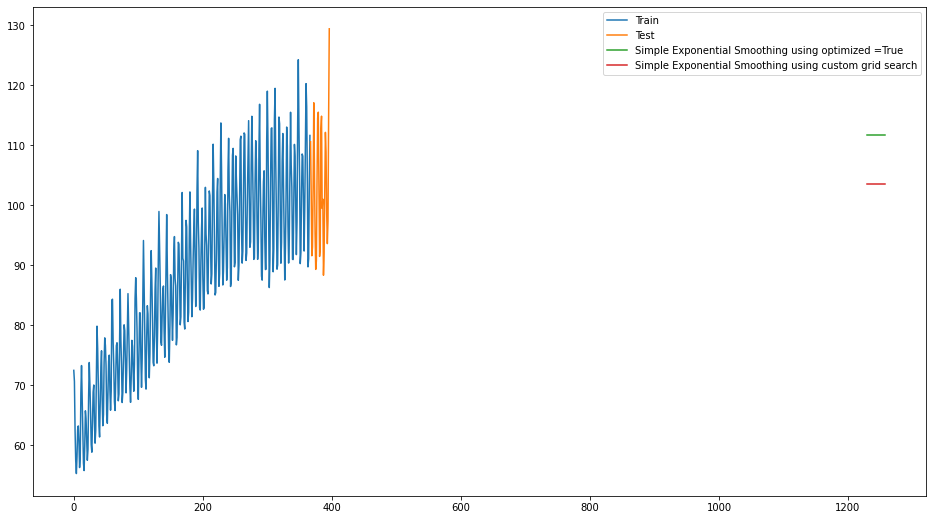

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized =True')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.legend(loc='best')
plt.show()

**Double exponential smoothing**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
df = pd.read_csv(r'/content/Electric_Production.csv')

In [ ]:
df['IPG2211A2N'] = df['IPG2211A2N']

In [ ]:
train = df.IPG2211A2N[0:-30]
test = df.IPG2211A2N[-30:]

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
from sklearn.model_selection import ParameterGrid
param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False]}
pg = list(ParameterGrid(param_grid))

In [ ]:
#Holt Parameters:
#    endog (array-like) – Time series
#    expoential (bool, optional) – Type of trend component.
#    damped (bool, optional) – Should the trend component be damped.

In [ ]:
#fit Parameters:
#    smoothing_level (float, optional) – The alpha value of the simple exponential smoothing, if the value is set then this value will be used as the value.
#    smoothing_slope (float, optional) – The beta value of the holts trend method, if the value is set then this value will be used as the value.
#    damping_slope (float, optional) – The phi value of the damped method, if the value is set then this value will be used as the value.
#    optimized (bool, optional) – Should the values that have not been set above be optimized automatically?

Similar to the Simple Exponential Smoothing method, we calculate the RMSE and R² for all possible parameter combinations defined within our param_grid

In [ ]:
df_results_moni = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope','damped','RMSE','r2'])
start = timer()
for a,b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    print(smoothing_level, smoothing_slope, damping_slope,damped)
    fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
    #fit1.summary
    z = fit1.forecast(30)
    print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')


0.1 0.1 0.1 True
367    103.485013
368    103.485906
369    103.485995
370    103.486004
371    103.486005
372    103.486005
373    103.486005
374    103.486005
375    103.486005
376    103.486005
377    103.486005
378    103.486005
379    103.486005
380    103.486005
381    103.486005
382    103.486005
383    103.486005
384    103.486005
385    103.486005
386    103.486005
387    103.486005
388    103.486005
389    103.486005
390    103.486005
391    103.486005
392    103.486005
393    103.486005
394    103.486005
395    103.486005
396    103.486005
dtype: float64
 RMSE is 10.18365884148316
0.1 0.2 0.1 True
367    103.488334
368    103.490121
369    103.490300
370    103.490318
371    103.490320
372    103.490320
373    103.490320
374    103.490320
375    103.490320
376    103.490320
377    103.490320
378    103.490320
379    103.490320
380    103.490320
381    103.490320
382    103.490320
383    103.490320
384    103.490320
385    103.490320
386    103.490320
387    103.490320
388   

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 RMSE is 10.185684421268403
0.2 0.1 0.1 True
367    103.594856
368    103.596869
369    103.597070
370    103.597090
371    103.597092
372    103.597093
373    103.597093
374    103.597093
375    103.597093
376    103.597093
377    103.597093
378    103.597093
379    103.597093
380    103.597093
381    103.597093
382    103.597093
383    103.597093
384    103.597093
385    103.597093
386    103.597093
387    103.597093
388    103.597093
389    103.597093
390    103.597093
391    103.597093
392    103.597093
393    103.597093
394    103.597093
395    103.597093
396    103.597093
dtype: float64
 RMSE is 10.190933281283057
0.2 0.2 0.1 True
367    103.593109
368    103.597147
369    103.597551
370    103.597592
371    103.597596
372    103.597596
373    103.597596
374    103.597596
375    103.597596
376    103.597596
377    103.597596
378    103.597596
379    103.597596
380    103.597596
381    103.597596
382    103.597596
383    103.597596
384    103.597596
385    103.597596
386    103.59

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.792957
368    103.803356
369    103.804396
370    103.804500
371    103.804511
372    103.804512
373    103.804512
374    103.804512
375    103.804512
376    103.804512
377    103.804512
378    103.804512
379    103.804512
380    103.804512
381    103.804512
382    103.804512
383    103.804512
384    103.804512
385    103.804512
386    103.804512
387    103.804512
388    103.804512
389    103.804512
390    103.804512
391    103.804512
392    103.804512
393    103.804512
394    103.804512
395    103.804512
396    103.804512
dtype: float64
 RMSE is 10.207883730993279
0.3 0.4 0.1 True
367    103.800827
368    103.814748
369    103.816141
370    103.816280
371    103.816294
372    103.816295
373    103.816295
374    103.816295
375    103.816295
376    103.816295
377    103.816295
378    103.816295
379    103.816295
380    103.816295
381    103.816295
382    103.816295
383    103.816295
384    103.816295
385    103.816295
386    103.816295
387    103.816295
388    103.816295
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    104.418423
368    104.433685
369    104.435211
370    104.435364
371    104.435379
372    104.435381
373    104.435381
374    104.435381
375    104.435381
376    104.435381
377    104.435381
378    104.435381
379    104.435381
380    104.435381
381    104.435381
382    104.435381
383    104.435381
384    104.435381
385    104.435381
386    104.435381
387    104.435381
388    104.435381
389    104.435381
390    104.435381
391    104.435381
392    104.435381
393    104.435381
394    104.435381
395    104.435381
396    104.435381
dtype: float64
 RMSE is 10.284494081707622
0.4 0.4 0.1 True
367    104.448699
368    104.469121
369    104.471163
370    104.471367
371    104.471388
372    104.471390
373    104.471390
374    104.471390
375    104.471390
376    104.471390
377    104.471390
378    104.471390
379    104.471390
380    104.471390
381    104.471390
382    104.471390
383    104.471390
384    104.471390
385    104.471390
386    104.471390
387    104.471390
388    104.471390
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 RMSE is 10.500153758155253
0.5 0.4 0.1 True
367    105.542895
368    105.569683
369    105.572361
370    105.572629
371    105.572656
372    105.572659
373    105.572659
374    105.572659
375    105.572659
376    105.572659
377    105.572659
378    105.572659
379    105.572659
380    105.572659
381    105.572659
382    105.572659
383    105.572659
384    105.572659
385    105.572659
386    105.572659
387    105.572659
388    105.572659
389    105.572659
390    105.572659
391    105.572659
392    105.572659
393    105.572659
394    105.572659
395    105.572659
396    105.572659
dtype: float64
 RMSE is 10.517199478159515
0.5 0.5 0.1 True
367    105.603269
368    105.636818
369    105.640173
370    105.640508
371    105.640542
372    105.640545
373    105.640545
374    105.640545
375    105.640545
376    105.640545
377    105.640545
378    105.640545
379    105.640545
380    105.640545
381    105.640545
382    105.640545
383    105.640545
384    105.640545
385    105.640545
386    105.64

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    106.849923
368    106.874083
369    106.876499
370    106.876741
371    106.876765
372    106.876768
373    106.876768
374    106.876768
375    106.876768
376    106.876768
377    106.876768
378    106.876768
379    106.876768
380    106.876768
381    106.876768
382    106.876768
383    106.876768
384    106.876768
385    106.876768
386    106.876768
387    106.876768
388    106.876768
389    106.876768
390    106.876768
391    106.876768
392    106.876768
393    106.876768
394    106.876768
395    106.876768
396    106.876768
dtype: float64
 RMSE is 10.924276181230663
0.6 0.4 0.1 True
367    106.936201
368    106.968408
369    106.971628
370    106.971950
371    106.971982
372    106.971986
373    106.971986
374    106.971986
375    106.971986
376    106.971986
377    106.971986
378    106.971986
379    106.971986
380    106.971986
381    106.971986
382    106.971986
383    106.971986
384    106.971986
385    106.971986
386    106.971986
387    106.971986
388    106.971986
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    108.427139
368    108.463288
369    108.466903
370    108.467264
371    108.467300
372    108.467304
373    108.467304
374    108.467305
375    108.467305
376    108.467305
377    108.467305
378    108.467305
379    108.467305
380    108.467305
381    108.467305
382    108.467305
383    108.467305
384    108.467305
385    108.467305
386    108.467305
387    108.467305
388    108.467305
389    108.467305
390    108.467305
391    108.467305
392    108.467305
393    108.467305
394    108.467305
395    108.467305
396    108.467305
dtype: float64
 RMSE is 11.601356286783547
0.7 0.5 0.1 True
367    108.531237
368    108.576279
369    108.580784
370    108.581234
371    108.581279
372    108.581284
373    108.581284
374    108.581284
375    108.581284
376    108.581284
377    108.581284
378    108.581284
379    108.581284
380    108.581284
381    108.581284
382    108.581284
383    108.581284
384    108.581284
385    108.581284
386    108.581284
387    108.581284
388    108.581284
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    109.947701
368    109.995452
369    110.000227
370    110.000705
371    110.000753
372    110.000757
373    110.000758
374    110.000758
375    110.000758
376    110.000758
377    110.000758
378    110.000758
379    110.000758
380    110.000758
381    110.000758
382    110.000758
383    110.000758
384    110.000758
385    110.000758
386    110.000758
387    110.000758
388    110.000758
389    110.000758
390    110.000758
391    110.000758
392    110.000758
393    110.000758
394    110.000758
395    110.000758
396    110.000758
dtype: float64
 RMSE is 12.41302882269125
0.8 0.6 0.1 True
367    110.056045
368    110.112982
369    110.118676
370    110.119245
371    110.119302
372    110.119308
373    110.119308
374    110.119308
375    110.119308
376    110.119308
377    110.119308
378    110.119308
379    110.119308
380    110.119308
381    110.119308
382    110.119308
383    110.119308
384    110.119308
385    110.119308
386    110.119308
387    110.119308
388    110.119308
389  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    111.359904
368    111.426589
369    111.433257
370    111.433924
371    111.433991
372    111.433997
373    111.433998
374    111.433998
375    111.433998
376    111.433998
377    111.433998
378    111.433998
379    111.433998
380    111.433998
381    111.433998
382    111.433998
383    111.433998
384    111.433998
385    111.433998
386    111.433998
387    111.433998
388    111.433998
389    111.433998
390    111.433998
391    111.433998
392    111.433998
393    111.433998
394    111.433998
395    111.433998
396    111.433998
dtype: float64
 RMSE is 13.28719186689382
0.9 0.8 0.1 True
367    111.458310
368    111.533781
369    111.541328
370    111.542083
371    111.542158
372    111.542166
373    111.542167
374    111.542167
375    111.542167
376    111.542167
377    111.542167
378    111.542167
379    111.542167
380    111.542167
381    111.542167
382    111.542167
383    111.542167
384    111.542167
385    111.542167
386    111.542167
387    111.542167
388    111.542167
389  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.503061
368    103.530512
369    103.536002
370    103.537100
371    103.537320
372    103.537364
373    103.537373
374    103.537374
375    103.537375
376    103.537375
377    103.537375
378    103.537375
379    103.537375
380    103.537375
381    103.537375
382    103.537375
383    103.537375
384    103.537375
385    103.537375
386    103.537375
387    103.537375
388    103.537375
389    103.537375
390    103.537375
391    103.537375
392    103.537375
393    103.537375
394    103.537375
395    103.537375
396    103.537375
dtype: float64
 RMSE is 10.187533448822327
0.1 0.9 0.2 True
367    103.502730
368    103.533690
369    103.539882
370    103.541121
371    103.541368
372    103.541418
373    103.541428
374    103.541430
375    103.541430
376    103.541430
377    103.541430
378    103.541430
379    103.541430
380    103.541430
381    103.541430
382    103.541430
383    103.541430
384    103.541430
385    103.541430
386    103.541430
387    103.541430
388    103.541430
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.526546
368    103.583676
369    103.595102
370    103.597388
371    103.597845
372    103.597936
373    103.597954
374    103.597958
375    103.597959
376    103.597959
377    103.597959
378    103.597959
379    103.597959
380    103.597959
381    103.597959
382    103.597959
383    103.597959
384    103.597959
385    103.597959
386    103.597959
387    103.597959
388    103.597959
389    103.597959
390    103.597959
391    103.597959
392    103.597959
393    103.597959
394    103.597959
395    103.597959
396    103.597959
dtype: float64
 RMSE is 10.192378588842292
0.2 0.8 0.2 True
367    103.517515
368    103.583324
369    103.596486
370    103.599118
371    103.599644
372    103.599750
373    103.599771
374    103.599775
375    103.599776
376    103.599776
377    103.599776
378    103.599776
379    103.599776
380    103.599776
381    103.599776
382    103.599776
383    103.599776
384    103.599776
385    103.599776
386    103.599776
387    103.599776
388    103.599776
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.831395
368    103.932950
369    103.953261
370    103.957323
371    103.958135
372    103.958298
373    103.958330
374    103.958337
375    103.958338
376    103.958339
377    103.958339
378    103.958339
379    103.958339
380    103.958339
381    103.958339
382    103.958339
383    103.958339
384    103.958339
385    103.958339
386    103.958339
387    103.958339
388    103.958339
389    103.958339
390    103.958339
391    103.958339
392    103.958339
393    103.958339
394    103.958339
395    103.958339
396    103.958339
dtype: float64
 RMSE is 10.225131037556848
0.3 0.8 0.2 True
367    103.847900
368    103.965113
369    103.988556
370    103.993244
371    103.994182
372    103.994370
373    103.994407
374    103.994415
375    103.994416
376    103.994417
377    103.994417
378    103.994417
379    103.994417
380    103.994417
381    103.994417
382    103.994417
383    103.994417
384    103.994417
385    103.994417
386    103.994417
387    103.994417
388    103.994417
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.4 0.8 0.2 True
367    104.803530
368    104.978625
369    105.013644
370    105.020647
371    105.022048
372    105.022328
373    105.022384
374    105.022395
375    105.022398
376    105.022398
377    105.022398
378    105.022398
379    105.022398
380    105.022398
381    105.022398
382    105.022398
383    105.022398
384    105.022398
385    105.022398
386    105.022398
387    105.022398
388    105.022398
389    105.022398
390    105.022398
391    105.022398
392    105.022398
393    105.022398
394    105.022398
395    105.022398
396    105.022398
dtype: float64
 RMSE is 10.392461002229597
0.4 0.9 0.2 True
367    104.880415
368    105.079024
369    105.118746
370    105.126690
371    105.128279
372    105.128597
373    105.128661
374    105.128673
375    105.128676
376    105.128676
377    105.128676
378    105.128676
379    105.128676
380    105.128676
381    105.128676
382    105.128676
383    105.128676
384    105.128676
385    105.128676
386    105.128676
387    105.128676
388  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    106.154646
368    106.354700
369    106.394711
370    106.402713
371    106.404313
372    106.404633
373    106.404697
374    106.404710
375    106.404713
376    106.404713
377    106.404713
378    106.404713
379    106.404713
380    106.404713
381    106.404713
382    106.404713
383    106.404713
384    106.404713
385    106.404713
386    106.404713
387    106.404713
388    106.404713
389    106.404713
390    106.404713
391    106.404713
392    106.404713
393    106.404713
394    106.404713
395    106.404713
396    106.404713
dtype: float64
 RMSE is 10.76225831268504
0.5 0.8 0.2 True
367    106.293984
368    106.523731
369    106.569681
370    106.578871
371    106.580709
372    106.581077
373    106.581150
374    106.581165
375    106.581168
376    106.581168
377    106.581168
378    106.581168
379    106.581168
380    106.581168
381    106.581168
382    106.581168
383    106.581168
384    106.581168
385    106.581168
386    106.581168
387    106.581168
388    106.581168
389  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 RMSE is 11.345319268687597
0.6 0.7 0.2 True
367    107.847049
368    108.086027
369    108.133822
370    108.143382
371    108.145293
372    108.145676
373    108.145752
374    108.145768
375    108.145771
376    108.145771
377    108.145771
378    108.145771
379    108.145771
380    108.145771
381    108.145771
382    108.145771
383    108.145771
384    108.145771
385    108.145771
386    108.145771
387    108.145771
388    108.145771
389    108.145771
390    108.145771
391    108.145771
392    108.145771
393    108.145771
394    108.145771
395    108.145771
396    108.145771
dtype: float64
 RMSE is 11.450226888611983
0.6 0.8 0.2 True
367    108.039144
368    108.312160
369    108.366763
370    108.377684
371    108.379868
372    108.380305
373    108.380392
374    108.380410
375    108.380413
376    108.380414
377    108.380414
378    108.380414
379    108.380414
380    108.380414
381    108.380414
382    108.380414
383    108.380414
384    108.380414
385    108.380414
386    108.38

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.7 0.6 0.2 True
367    109.310509
368    109.538809
369    109.584469
370    109.593601
371    109.595427
372    109.595792
373    109.595865
374    109.595880
375    109.595883
376    109.595883
377    109.595884
378    109.595884
379    109.595884
380    109.595884
381    109.595884
382    109.595884
383    109.595884
384    109.595884
385    109.595884
386    109.595884
387    109.595884
388    109.595884
389    109.595884
390    109.595884
391    109.595884
392    109.595884
393    109.595884
394    109.595884
395    109.595884
396    109.595884
dtype: float64
 RMSE is 12.184263523494955
0.7 0.7 0.2 True
367    109.529081
368    109.793935
369    109.846906
370    109.857500
371    109.859619
372    109.860042
373    109.860127
374    109.860144
375    109.860147
376    109.860148
377    109.860148
378    109.860148
379    109.860148
380    109.860148
381    109.860148
382    109.860148
383    109.860148
384    109.860148
385    109.860148
386    109.860148
387    109.860148
388  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

True
367    110.778585
368    111.019083
369    111.067182
370    111.076802
371    111.078726
372    111.079111
373    111.079188
374    111.079204
375    111.079207
376    111.079207
377    111.079207
378    111.079207
379    111.079207
380    111.079207
381    111.079207
382    111.079207
383    111.079207
384    111.079207
385    111.079207
386    111.079207
387    111.079207
388    111.079207
389    111.079207
390    111.079207
391    111.079207
392    111.079207
393    111.079207
394    111.079207
395    111.079207
396    111.079207
dtype: float64
 RMSE is 13.05952074271448
0.8 0.7 0.2 True
367    110.998211
368    111.275479
369    111.330932
370    111.342023
371    111.344241
372    111.344685
373    111.344774
374    111.344791
375    111.344795
376    111.344796
377    111.344796
378    111.344796
379    111.344796
380    111.344796
381    111.344796
382    111.344796
383    111.344796
384    111.344796
385    111.344796
386    111.344796
387    111.344796
388    111.344796


<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    111.956833
368    112.199659
369    112.248224
370    112.257937
371    112.259880
372    112.260269
373    112.260346
374    112.260362
375    112.260365
376    112.260366
377    112.260366
378    112.260366
379    112.260366
380    112.260366
381    112.260366
382    112.260366
383    112.260366
384    112.260366
385    112.260366
386    112.260366
387    112.260366
388    112.260366
389    112.260366
390    112.260366
391    112.260366
392    112.260366
393    112.260366
394    112.260366
395    112.260366
396    112.260366
dtype: float64
 RMSE is 13.830842113594029
0.9 0.7 0.2 True
367    112.155705
368    112.433955
369    112.489605
370    112.500735
371    112.502961
372    112.503406
373    112.503495
374    112.503513
375    112.503517
376    112.503517
377    112.503517
378    112.503517
379    112.503517
380    112.503517
381    112.503517
382    112.503517
383    112.503517
384    112.503517
385    112.503517
386    112.503517
387    112.503517
388    112.503517
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.1 0.7 0.3 True
367    103.476542
368    103.525092
369    103.539658
370    103.544027
371    103.545338
372    103.545731
373    103.545849
374    103.545885
375    103.545895
376    103.545898
377    103.545899
378    103.545900
379    103.545900
380    103.545900
381    103.545900
382    103.545900
383    103.545900
384    103.545900
385    103.545900
386    103.545900
387    103.545900
388    103.545900
389    103.545900
390    103.545900
391    103.545900
392    103.545900
393    103.545900
394    103.545900
395    103.545900
396    103.545900
dtype: float64
 RMSE is 10.188589963927512
0.1 0.8 0.3 True
367    103.468553
368    103.524295
369    103.541018
370    103.546035
371    103.547540
372    103.547991
373    103.548127
374    103.548167
375    103.548179
376    103.548183
377    103.548184
378    103.548185
379    103.548185
380    103.548185
381    103.548185
382    103.548185
383    103.548185
384    103.548185
385    103.548185
386    103.548185
387    103.548185
388  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.401216
368    103.524410
369    103.561368
370    103.572456
371    103.575782
372    103.576780
373    103.577079
374    103.577169
375    103.577196
376    103.577204
377    103.577206
378    103.577207
379    103.577207
380    103.577208
381    103.577208
382    103.577208
383    103.577208
384    103.577208
385    103.577208
386    103.577208
387    103.577208
388    103.577208
389    103.577208
390    103.577208
391    103.577208
392    103.577208
393    103.577208
394    103.577208
395    103.577208
396    103.577208
dtype: float64
 RMSE is 10.192538841922845
0.2 0.8 0.3 True
367    103.374845
368    103.517782
369    103.560663
370    103.573527
371    103.577387
372    103.578544
373    103.578892
374    103.578996
375    103.579027
376    103.579037
377    103.579039
378    103.579040
379    103.579041
380    103.579041
381    103.579041
382    103.579041
383    103.579041
384    103.579041
385    103.579041
386    103.579041
387    103.579041
388    103.579041
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.755647
368    103.986194
369    104.055358
370    104.076107
371    104.082332
372    104.084200
373    104.084760
374    104.084928
375    104.084978
376    104.084993
377    104.084998
378    104.084999
379    104.085000
380    104.085000
381    104.085000
382    104.085000
383    104.085000
384    104.085000
385    104.085000
386    104.085000
387    104.085000
388    104.085000
389    104.085000
390    104.085000
391    104.085000
392    104.085000
393    104.085000
394    104.085000
395    104.085000
396    104.085000
dtype: float64
 RMSE is 10.241915750283148
0.3 0.8 0.3 True
367    103.773756
368    104.042271
369    104.122826
370    104.146992
371    104.154242
372    104.156417
373    104.157070
374    104.157265
375    104.157324
376    104.157342
377    104.157347
378    104.157349
379    104.157349
380    104.157349
381    104.157349
382    104.157349
383    104.157349
384    104.157349
385    104.157349
386    104.157349
387    104.157349
388    104.157349
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    104.983243
368    105.396572
369    105.520571
370    105.557770
371    105.568930
372    105.572278
373    105.573282
374    105.573584
375    105.573674
376    105.573701
377    105.573709
378    105.573712
379    105.573713
380    105.573713
381    105.573713
382    105.573713
383    105.573713
384    105.573713
385    105.573713
386    105.573713
387    105.573713
388    105.573713
389    105.573713
390    105.573713
391    105.573713
392    105.573713
393    105.573713
394    105.573713
395    105.573713
396    105.573713
dtype: float64
 RMSE is 10.522015906525223
0.4 0.9 0.3 True
367    105.113194
368    105.585582
369    105.727298
370    105.769813
371    105.782568
372    105.786394
373    105.787542
374    105.787886
375    105.787990
376    105.788021
377    105.788030
378    105.788033
379    105.788034
380    105.788034
381    105.788034
382    105.788034
383    105.788034
384    105.788034
385    105.788034
386    105.788034
387    105.788034
388    105.788034
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    106.577640
368    107.052796
369    107.195343
370    107.238107
371    107.250936
372    107.254785
373    107.255940
374    107.256286
375    107.256390
376    107.256421
377    107.256431
378    107.256433
379    107.256434
380    107.256435
381    107.256435
382    107.256435
383    107.256435
384    107.256435
385    107.256435
386    107.256435
387    107.256435
388    107.256435
389    107.256435
390    107.256435
391    107.256435
392    107.256435
393    107.256435
394    107.256435
395    107.256435
396    107.256435
dtype: float64
 RMSE is 11.06929856250599
0.5 0.8 0.3 True
367    106.810557
368    107.359290
369    107.523910
370    107.573296
371    107.588112
372    107.592557
373    107.593890
374    107.594290
375    107.594410
376    107.594446
377    107.594457
378    107.594460
379    107.594461
380    107.594462
381    107.594462
382    107.594462
383    107.594462
384    107.594462
385    107.594462
386    107.594462
387    107.594462
388    107.594462
389  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 0.7 0.3 True
367    108.532619
368    109.102149
369    109.273008
370    109.324265
371    109.339643
372    109.344256
373    109.345640
374    109.346055
375    109.346180
376    109.346217
377    109.346228
378    109.346231
379    109.346232
380    109.346233
381    109.346233
382    109.346233
383    109.346233
384    109.346233
385    109.346233
386    109.346233
387    109.346233
388    109.346233
389    109.346233
390    109.346233
391    109.346233
392    109.346233
393    109.346233
394    109.346233
395    109.346233
396    109.346233
dtype: float64
 RMSE is 12.04350760317905
0.6 0.8 0.3 True
367    108.848211
368    109.500333
369    109.695969
370    109.754660
371    109.772268
372    109.777550
373    109.779134
374    109.779610
375    109.779752
376    109.779795
377    109.779808
378    109.779812
379    109.779813
380    109.779813
381    109.779813
382    109.779814
383    109.779814
384    109.779814
385    109.779814
386    109.779814
387    109.779814
388    10

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 RMSE is 13.175951855833278
0.7 0.8 0.3 True
367    110.726094
368    111.439721
369    111.653810
370    111.718036
371    111.737304
372    111.743084
373    111.744818
374    111.745339
375    111.745495
376    111.745542
377    111.745556
378    111.745560
379    111.745561
380    111.745562
381    111.745562
382    111.745562
383    111.745562
384    111.745562
385    111.745562
386    111.745562
387    111.745562
388    111.745562
389    111.745562
390    111.745562
391    111.745562
392    111.745562
393    111.745562
394    111.745562
395    111.745562
396    111.745562
dtype: float64
 RMSE is 13.475379140442927
0.7 0.9 0.3 True
367    111.068389
368    111.863535
369    112.102079
370    112.173642
371    112.195111
372    112.201551
373    112.203483
374    112.204063
375    112.204237
376    112.204289
377    112.204305
378    112.204310
379    112.204311
380    112.204311
381    112.204312
382    112.204312
383    112.204312
384    112.204312
385    112.204312
386    112.20

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    111.897996
368    112.552697
369    112.749108
370    112.808031
371    112.825708
372    112.831011
373    112.832602
374    112.833079
375    112.833222
376    112.833265
377    112.833278
378    112.833282
379    112.833283
380    112.833283
381    112.833284
382    112.833284
383    112.833284
384    112.833284
385    112.833284
386    112.833284
387    112.833284
388    112.833284
389    112.833284
390    112.833284
391    112.833284
392    112.833284
393    112.833284
394    112.833284
395    112.833284
396    112.833284
dtype: float64
 RMSE is 14.21251934308833
0.8 0.8 0.3 True
367    112.226754
368    112.961936
369    113.182490
370    113.248657
371    113.268507
372    113.274462
373    113.276248
374    113.276784
375    113.276945
376    113.276993
377    113.277008
378    113.277012
379    113.277013
380    113.277014
381    113.277014
382    113.277014
383    113.277014
384    113.277014
385    113.277014
386    113.277014
387    113.277014
388    113.277014
389  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    112.711644
368    113.284949
369    113.456940
370    113.508538
371    113.524017
372    113.528661
373    113.530054
374    113.530472
375    113.530597
376    113.530635
377    113.530646
378    113.530650
379    113.530651
380    113.530651
381    113.530651
382    113.530651
383    113.530651
384    113.530651
385    113.530651
386    113.530651
387    113.530651
388    113.530651
389    113.530651
390    113.530651
391    113.530651
392    113.530651
393    113.530651
394    113.530651
395    113.530651
396    113.530651
dtype: float64
 RMSE is 14.709485708595459
0.9 0.7 0.3 True
367    113.009496
368    113.661887
369    113.857604
370    113.916319
371    113.933934
372    113.939218
373    113.940803
374    113.941279
375    113.941422
376    113.941464
377    113.941477
378    113.941481
379    113.941482
380    113.941483
381    113.941483
382    113.941483
383    113.941483
384    113.941483
385    113.941483
386    113.941483
387    113.941483
388    113.941483
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.421081
368    103.492081
369    103.520481
370    103.531841
371    103.536385
372    103.538203
373    103.538930
374    103.539221
375    103.539337
376    103.539384
377    103.539402
378    103.539410
379    103.539413
380    103.539414
381    103.539414
382    103.539414
383    103.539414
384    103.539415
385    103.539415
386    103.539415
387    103.539415
388    103.539415
389    103.539415
390    103.539415
391    103.539415
392    103.539415
393    103.539415
394    103.539415
395    103.539415
396    103.539415
dtype: float64
 RMSE is 10.188524165968666
0.1 0.8 0.4 True
367    103.397342
368    103.479073
369    103.511765
370    103.524842
371    103.530073
372    103.532165
373    103.533002
374    103.533337
375    103.533471
376    103.533524
377    103.533546
378    103.533554
379    103.533558
380    103.533559
381    103.533560
382    103.533560
383    103.533560
384    103.533560
385    103.533560
386    103.533560
387    103.533560
388    103.533560
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.248048
368    103.413747
369    103.480026
370    103.506538
371    103.517143
372    103.521384
373    103.523081
374    103.523760
375    103.524031
376    103.524140
377    103.524183
378    103.524201
379    103.524208
380    103.524211
381    103.524212
382    103.524212
383    103.524212
384    103.524212
385    103.524212
386    103.524212
387    103.524212
388    103.524212
389    103.524212
390    103.524212
391    103.524212
392    103.524212
393    103.524212
394    103.524212
395    103.524212
396    103.524212
dtype: float64
 RMSE is 10.189726566645707
0.2 0.7 0.4 True
367    103.188506
368    103.386820
369    103.466145
370    103.497875
371    103.510567
372    103.515644
373    103.517675
374    103.518487
375    103.518812
376    103.518942
377    103.518994
378    103.519015
379    103.519023
380    103.519027
381    103.519028
382    103.519028
383    103.519029
384    103.519029
385    103.519029
386    103.519029
387    103.519029
388    103.519029
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 RMSE is 10.247003832027826
0.3 0.7 0.4 True
367    103.561973
368    103.963474
369    104.124074
370    104.188314
371    104.214010
372    104.224288
373    104.228399
374    104.230044
375    104.230702
376    104.230965
377    104.231070
378    104.231112
379    104.231129
380    104.231136
381    104.231139
382    104.231140
383    104.231140
384    104.231140
385    104.231140
386    104.231140
387    104.231140
388    104.231140
389    104.231140
390    104.231140
391    104.231140
392    104.231140
393    104.231140
394    104.231140
395    104.231140
396    104.231140
dtype: float64
 RMSE is 10.26214362818344
0.3 0.8 0.4 True
367    103.571826
368    104.045756
369    104.235329
370    104.311157
371    104.341489
372    104.353622
373    104.358475
374    104.360416
375    104.361192
376    104.361503
377    104.361627
378    104.361677
379    104.361697
380    104.361705
381    104.361708
382    104.361709
383    104.361710
384    104.361710
385    104.361710
386    104.361

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 0.7 0.4 True
367    104.907945
368    105.556287
369    105.815624
370    105.919359
371    105.960853
372    105.977451
373    105.984090
374    105.986745
375    105.987807
376    105.988232
377    105.988402
378    105.988470
379    105.988498
380    105.988508
381    105.988513
382    105.988514
383    105.988515
384    105.988515
385    105.988516
386    105.988516
387    105.988516
388    105.988516
389    105.988516
390    105.988516
391    105.988516
392    105.988516
393    105.988516
394    105.988516
395    105.988516
396    105.988516
dtype: float64
 RMSE is 10.63267633723385
0.4 0.8 0.4 True
367    105.080875
368    105.843254
369    106.148206
370    106.270187
371    106.318979
372    106.338496
373    106.346303
374    106.349426
375    106.350675
376    106.351174
377    106.351374
378    106.351454
379    106.351486
380    106.351499
381    106.351504
382    106.351506
383    106.351507
384    106.351507
385    106.351507
386    106.351507
387    106.351507
388    10

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    106.969974
368    107.855057
369    108.209090
370    108.350703
371    108.407349
372    108.430007
373    108.439070
374    108.442695
375    108.444145
376    108.444725
377    108.444957
378    108.445050
379    108.445087
380    108.445102
381    108.445108
382    108.445111
383    108.445112
384    108.445112
385    108.445112
386    108.445112
387    108.445112
388    108.445112
389    108.445112
390    108.445112
391    108.445112
392    108.445112
393    108.445112
394    108.445112
395    108.445112
396    108.445112
dtype: float64
 RMSE is 11.576280981216353
0.5 0.8 0.4 True
367    107.319394
368    108.350251
369    108.762593
370    108.927530
371    108.993505
372    109.019895
373    109.030451
374    109.034674
375    109.036363
376    109.037038
377    109.037308
378    109.037416
379    109.037460
380    109.037477
381    109.037484
382    109.037487
383    109.037488
384    109.037488
385    109.037488
386    109.037488
387    109.037488
388    109.037488
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 RMSE is 12.992743284878735
0.6 0.8 0.4 True
367    109.708952
368    110.937876
369    111.429446
370    111.626074
371    111.704725
372    111.736185
373    111.748770
374    111.753803
375    111.755817
376    111.756622
377    111.756944
378    111.757073
379    111.757125
380    111.757145
381    111.757154
382    111.757157
383    111.757158
384    111.757159
385    111.757159
386    111.757159
387    111.757159
388    111.757159
389    111.757159
390    111.757159
391    111.757159
392    111.757159
393    111.757159
394    111.757159
395    111.757159
396    111.757159
dtype: float64
 RMSE is 13.454695657898723
0.6 0.9 0.4 True
367    110.185060
368    111.571935
369    112.126686
370    112.348586
371    112.437346
372    112.472850
373    112.487051
374    112.492732
375    112.495004
376    112.495913
377    112.496277
378    112.496422
379    112.496480
380    112.496504
381    112.496513
382    112.496517
383    112.496518
384    112.496519
385    112.496519
386    112.49

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u


 RMSE is 14.474617645134085
0.7 0.8 0.4 True
367    111.782261
368    113.119763
369    113.654764
370    113.868764
371    113.954364
372    113.988604
373    114.002300
374    114.007778
375    114.009970
376    114.010846
377    114.011197
378    114.011337
379    114.011393
380    114.011416
381    114.011425
382    114.011428
383    114.011430
384    114.011430
385    114.011431
386    114.011431
387    114.011431
388    114.011431
389    114.011431
390    114.011431
391    114.011431
392    114.011431
393    114.011431
394    114.011431
395    114.011431
396    114.011431
dtype: float64
 RMSE is 15.016732441025392
0.7 0.9 0.4 True
367    112.268685
368    113.756869
369    114.352143
370    114.590252
371    114.685496
372    114.723594
373    114.738833
374    114.744928
375    114.747366
376    114.748342
377    114.748732
378    114.748888
379    114.748950
380    114.748975
381    114.748985
382    114.748989
383    114.748991
384    114.748992
385    114.748992
386    114.7

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    112.861715
368    114.081526
369    114.569451
370    114.764620
371    114.842688
372    114.873916
373    114.886406
374    114.891403
375    114.893401
376    114.894201
377    114.894520
378    114.894648
379    114.894700
380    114.894720
381    114.894728
382    114.894731
383    114.894733
384    114.894733
385    114.894734
386    114.894734
387    114.894734
388    114.894734
389    114.894734
390    114.894734
391    114.894734
392    114.894734
393    114.894734
394    114.894734
395    114.894734
396    114.894734
dtype: float64
 RMSE is 15.681095792136967
0.8 0.8 0.4 True
367    113.313082
368    114.677901
369    115.223829
370    115.442200
371    115.529548
372    115.564487
373    115.578463
374    115.584053
375    115.586290
376    115.587184
377    115.587542
378    115.587685
379    115.587742
380    115.587765
381    115.587774
382    115.587778
383    115.587779
384    115.587780
385    115.587780
386    115.587780
387    115.587780
388    115.587780
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    113.920706
368    115.127644
369    115.610420
370    115.803530
371    115.880774
372    115.911671
373    115.924030
374    115.928974
375    115.930952
376    115.931743
377    115.932059
378    115.932185
379    115.932236
380    115.932256
381    115.932264
382    115.932268
383    115.932269
384    115.932269
385    115.932270
386    115.932270
387    115.932270
388    115.932270
389    115.932270
390    115.932270
391    115.932270
392    115.932270
393    115.932270
394    115.932270
395    115.932270
396    115.932270
dtype: float64
 RMSE is 16.48323968762038
0.9 0.8 0.4 True
367    114.285914
368    115.619254
369    116.152591
370    116.365925
371    116.451259
372    116.485392
373    116.499046
374    116.504507
375    116.506692
376    116.507565
377    116.507915
378    116.508055
379    116.508111
380    116.508133
381    116.508142
382    116.508146
383    116.508147
384    116.508148
385    116.508148
386    116.508148
387    116.508148
388    116.508148
389  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.341432
368    103.419055
369    103.457866
370    103.477272
371    103.486974
372    103.491826
373    103.494252
374    103.495464
375    103.496071
376    103.496374
377    103.496526
378    103.496601
379    103.496639
380    103.496658
381    103.496668
382    103.496673
383    103.496675
384    103.496676
385    103.496677
386    103.496677
387    103.496677
388    103.496677
389    103.496677
390    103.496677
391    103.496677
392    103.496677
393    103.496677
394    103.496677
395    103.496677
396    103.496677
dtype: float64
 RMSE is 10.185526731840707
0.1 0.8 0.5 True
367    103.294074
368    103.383562
369    103.428306
370    103.450679
371    103.461865
372    103.467458
373    103.470254
374    103.471652
375    103.472352
376    103.472701
377    103.472876
378    103.472963
379    103.473007
380    103.473029
381    103.473040
382    103.473045
383    103.473048
384    103.473049
385    103.473050
386    103.473050
387    103.473051
388    103.473051
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    102.757769
368    103.062595
369    103.215008
370    103.291214
371    103.329318
372    103.348369
373    103.357895
374    103.362658
375    103.365039
376    103.366230
377    103.366825
378    103.367123
379    103.367272
380    103.367346
381    103.367384
382    103.367402
383    103.367412
384    103.367416
385    103.367419
386    103.367420
387    103.367420
388    103.367421
389    103.367421
390    103.367421
391    103.367421
392    103.367421
393    103.367421
394    103.367421
395    103.367421
396    103.367421
dtype: float64
 RMSE is 10.183249162290556
0.2 0.9 0.5 True
367    102.645514
368    103.003645
369    103.182711
370    103.272244
371    103.317011
372    103.339394
373    103.350586
374    103.356181
375    103.358979
376    103.360378
377    103.361078
378    103.361427
379    103.361602
380    103.361690
381    103.361733
382    103.361755
383    103.361766
384    103.361772
385    103.361774
386    103.361776
387    103.361776
388    103.361777
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.198133
368    104.037282
369    104.456857
370    104.666644
371    104.771538
372    104.823985
373    104.850208
374    104.863320
375    104.869876
376    104.873154
377    104.874793
378    104.875612
379    104.876022
380    104.876227
381    104.876329
382    104.876381
383    104.876406
384    104.876419
385    104.876425
386    104.876429
387    104.876430
388    104.876431
389    104.876431
390    104.876432
391    104.876432
392    104.876432
393    104.876432
394    104.876432
395    104.876432
396    104.876432
dtype: float64
 RMSE is 10.364015585710792
0.4 0.1 0.5 True
367    104.299875
368    104.403971
369    104.456018
370    104.482042
371    104.495054
372    104.501560
373    104.504813
374    104.506439
375    104.507252
376    104.507659
377    104.507862
378    104.507964
379    104.508015
380    104.508040
381    104.508053
382    104.508059
383    104.508062
384    104.508064
385    104.508065
386    104.508065
387    104.508065
388    104.508065
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    108.327699
368    110.281142
369    111.257864
370    111.746224
371    111.990405
372    112.112495
373    112.173540
374    112.204062
375    112.219324
376    112.226954
377    112.230770
378    112.232677
379    112.233631
380    112.234108
381    112.234347
382    112.234466
383    112.234525
384    112.234555
385    112.234570
386    112.234578
387    112.234581
388    112.234583
389    112.234584
390    112.234585
391    112.234585
392    112.234585
393    112.234585
394    112.234585
395    112.234585
396    112.234585
dtype: float64
 RMSE is 13.698177006123842
0.6 0.1 0.5 True
367    106.898660
368    107.102200
369    107.203970
370    107.254855
371    107.280297
372    107.293018
373    107.299379
374    107.302559
375    107.304149
376    107.304944
377    107.305342
378    107.305541
379    107.305640
380    107.305690
381    107.305715
382    107.305727
383    107.305733
384    107.305736
385    107.305738
386    107.305739
387    107.305739
388    107.305739
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    108.478903
368    108.725842
369    108.849311
370    108.911046
371    108.941914
372    108.957347
373    108.965064
374    108.968923
375    108.970852
376    108.971816
377    108.972299
378    108.972540
379    108.972660
380    108.972721
381    108.972751
382    108.972766
383    108.972773
384    108.972777
385    108.972779
386    108.972780
387    108.972780
388    108.972781
389    108.972781
390    108.972781
391    108.972781
392    108.972781
393    108.972781
394    108.972781
395    108.972781
396    108.972781
dtype: float64
 RMSE is 11.841565989557424
0.7 0.2 0.5 True
367    109.009634
368    109.522165
369    109.778430
370    109.906562
371    109.970628
372    110.002662
373    110.018678
374    110.026686
375    110.030691
376    110.032693
377    110.033694
378    110.034194
379    110.034445
380    110.034570
381    110.034632
382    110.034663
383    110.034679
384    110.034687
385    110.034691
386    110.034693
387    110.034694
388    110.034694
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

True
367    109.974600
368    110.255343
369    110.395715
370    110.465901
371    110.500994
372    110.518540
373    110.527313
374    110.531700
375    110.533893
376    110.534990
377    110.535538
378    110.535812
379    110.535949
380    110.536018
381    110.536052
382    110.536069
383    110.536078
384    110.536082
385    110.536084
386    110.536085
387    110.536086
388    110.536086
389    110.536086
390    110.536086
391    110.536086
392    110.536086
393    110.536086
394    110.536086
395    110.536086
396    110.536086
dtype: float64
 RMSE is 12.711151977956355
0.8 0.2 0.5 True
367    110.601755
368    111.176125
369    111.463310
370    111.606902
371    111.678698
372    111.714596
373    111.732545
374    111.741520
375    111.746007
376    111.748251
377    111.749372
378    111.749933
379    111.750214
380    111.750354
381    111.750424
382    111.750459
383    111.750477
384    111.750486
385    111.750490
386    111.750492
387    111.750493
388    111.750494

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 RMSE is 14.396794651155716
0.9 0.3 0.5 True
367    112.565977
368    113.483262
369    113.941905
370    114.171226
371    114.285886
372    114.343217
373    114.371882
374    114.386215
375    114.393381
376    114.396964
377    114.398756
378    114.399651
379    114.400099
380    114.400323
381    114.400435
382    114.400491
383    114.400519
384    114.400533
385    114.400540
386    114.400544
387    114.400545
388    114.400546
389    114.400547
390    114.400547
391    114.400547
392    114.400547
393    114.400547
394    114.400547
395    114.400547
396    114.400547
dtype: float64
 RMSE is 15.29376930928157
0.9 0.4 0.5 True
367    113.204801
368    114.415257
369    115.020486
370    115.323100
371    115.474407
372    115.550060
373    115.587887
374    115.606800
375    115.616257
376    115.620985
377    115.623349
378    115.624532
379    115.625123
380    115.625418
381    115.625566
382    115.625640
383    115.625677
384    115.625695
385    115.625704
386    115.625

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 RMSE is 10.187147798326956
0.1 0.4 0.6 True
367    103.439701
368    103.471519
369    103.490610
370    103.502065
371    103.508938
372    103.513061
373    103.515536
374    103.517020
375    103.517911
376    103.518445
377    103.518766
378    103.518958
379    103.519074
380    103.519143
381    103.519185
382    103.519209
383    103.519224
384    103.519233
385    103.519239
386    103.519242
387    103.519244
388    103.519245
389    103.519246
390    103.519246
391    103.519247
392    103.519247
393    103.519247
394    103.519247
395    103.519247
396    103.519247
dtype: float64
 RMSE is 10.185743865271974
0.1 0.5 0.6 True
367    103.387570
368    103.426309
369    103.449552
370    103.463498
371    103.471866
372    103.476886
373    103.479899
374    103.481706
375    103.482790
376    103.483441
377    103.483831
378    103.484066
379    103.484206
380    103.484291
381    103.484341
382    103.484372
383    103.484390
384    103.484401
385    103.484407
386    103.48

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.2 0.3 0.6 True
367    103.179701
368    103.266211
369    103.318118
370    103.349261
371    103.367948
372    103.379159
373    103.385886
374    103.389923
375    103.392344
376    103.393797
377    103.394669
378    103.395192
379    103.395506
380    103.395695
381    103.395808
382    103.395875
383    103.395916
384    103.395940
385    103.395955
386    103.395964
387    103.395969
388    103.395972
389    103.395974
390    103.395975
391    103.395976
392    103.395976
393    103.395977
394    103.395977
395    103.395977
396    103.395977
dtype: float64
 RMSE is 10.179119227921626
0.2 0.4 0.6 True
367    103.011632
368    103.132487
369    103.204999
370    103.248506
371    103.274611
372    103.290274
373    103.299671
374    103.305310
375    103.308693
376    103.310723
377    103.311941
378    103.312672
379    103.313110
380    103.313373
381    103.313531
382    103.313626
383    103.313682
384    103.313717
385    103.313737
386    103.313749
387    103.313757
388  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.3 0.3 0.6 True
367    103.228743
368    103.454841
369    103.590499
370    103.671895
371    103.720732
372    103.750034
373    103.767615
374    103.778164
375    103.784494
376    103.788291
377    103.790570
378    103.791937
379    103.792757
380    103.793249
381    103.793545
382    103.793722
383    103.793828
384    103.793892
385    103.793930
386    103.793953
387    103.793967
388    103.793975
389    103.793980
390    103.793983
391    103.793985
392    103.793986
393    103.793987
394    103.793987
395    103.793987
396    103.793987
dtype: float64
 RMSE is 10.20658130791978
0.3 0.4 0.6 True
367    103.049777
368    103.377765
369    103.574557
370    103.692633
371    103.763478
372    103.805986
373    103.831490
374    103.846792
375    103.855974
376    103.861483
377    103.864788
378    103.866772
379    103.867962
380    103.868675
381    103.869104
382    103.869361
383    103.869515
384    103.869608
385    103.869663
386    103.869696
387    103.869716
388   

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    104.088843
368    104.731362
369    105.116873
370    105.348180
371    105.486964
372    105.570234
373    105.620197
374    105.650174
375    105.668160
376    105.678952
377    105.685427
378    105.689312
379    105.691643
380    105.693042
381    105.693881
382    105.694385
383    105.694687
384    105.694868
385    105.694977
386    105.695042
387    105.695081
388    105.695105
389    105.695119
390    105.695127
391    105.695132
392    105.695135
393    105.695137
394    105.695138
395    105.695139
396    105.695139
dtype: float64
 RMSE is 10.52852256304107
0.4 0.5 0.6 True
367    104.158844
368    105.034069
369    105.559204
370    105.874285
371    106.063334
372    106.176763
373    106.244821
374    106.285655
375    106.310156
376    106.324856
377    106.333677
378    106.338969
379    106.342144
380    106.344049
381    106.345192
382    106.345878
383    106.346290
384    106.346537
385    106.346685
386    106.346774
387    106.346827
388    106.346859
389  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.5 0.5 0.6 True
367    106.412623
368    107.751759
369    108.555241
370    109.037330
371    109.326584
372    109.500136
373    109.604267
374    109.666746
375    109.704233
376    109.726725
377    109.740221
378    109.748318
379    109.753176
380    109.756091
381    109.757840
382    109.758890
383    109.759519
384    109.759897
385    109.760124
386    109.760260
387    109.760341
388    109.760390
389    109.760420
390    109.760437
391    109.760448
392    109.760454
393    109.760458
394    109.760460
395    109.760462
396    109.760462
dtype: float64
 RMSE is 12.159846534649127
0.5 0.6 0.6 True
367    106.912249
368    108.625248
369    109.653048
370    110.269728
371    110.639736
372    110.861740
373    110.994943
374    111.074865
375    111.122818
376    111.151590
377    111.168853
378    111.179211
379    111.185425
380    111.189154
381    111.191391
382    111.192734
383    111.193539
384    111.194022
385    111.194312
386    111.194486
387    111.194591
388  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    109.026734
368    110.767731
369    111.812329
370    112.439088
371    112.815144
372    113.040777
373    113.176157
374    113.257385
375    113.306122
376    113.335364
377    113.352909
378    113.363436
379    113.369752
380    113.373542
381    113.375816
382    113.377180
383    113.377999
384    113.378490
385    113.378785
386    113.378962
387    113.379068
388    113.379131
389    113.379169
390    113.379192
391    113.379206
392    113.379214
393    113.379219
394    113.379222
395    113.379224
396    113.379225
dtype: float64
 RMSE is 14.405642216934982
0.6 0.6 0.6 True
367    109.801445
368    111.982602
369    113.291296
370    114.076513
371    114.547643
372    114.830320
373    114.999927
374    115.101691
375    115.162750
376    115.199385
377    115.221366
378    115.234554
379    115.242468
380    115.247216
381    115.250064
382    115.251774
383    115.252799
384    115.253414
385    115.253784
386    115.254005
387    115.254138
388    115.254218
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.7 0.6 0.6 True
367    112.323848
368    114.801751
369    116.288493
370    117.180538
371    117.715765
372    118.036901
373    118.229583
374    118.345192
375    118.414558
376    118.456177
377    118.481148
378    118.496131
379    118.505121
380    118.510515
381    118.513751
382    118.515693
383    118.516858
384    118.517557
385    118.517977
386    118.518228
387    118.518379
388    118.518470
389    118.518524
390    118.518557
391    118.518576
392    118.518588
393    118.518595
394    118.518599
395    118.518602
396    118.518604
dtype: float64
 RMSE is 18.291743496120183
0.7 0.7 0.6 True
367    113.227130
368    116.146754
369    117.898529
370    118.949594
371    119.580233
372    119.958616
373    120.185646
374    120.321864
375    120.403595
376    120.452634
377    120.482057
378    120.499710
379    120.510303
380    120.516658
381    120.520471
382    120.522759
383    120.524132
384    120.524956
385    120.525450
386    120.525746
387    120.525924
388  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u


367    113.304968
368    115.478110
369    116.781995
370    117.564326
371    118.033724
372    118.315363
373    118.484347
374    118.585737
375    118.646571
376    118.683071
377    118.704972
378    118.718112
379    118.725996
380    118.730726
381    118.733564
382    118.735267
383    118.736289
384    118.736902
385    118.737270
386    118.737491
387    118.737623
388    118.737703
389    118.737750
390    118.737779
391    118.737796
392    118.737806
393    118.737813
394    118.737816
395    118.737819
396    118.737820
dtype: float64
 RMSE is 18.51294203643203
0.8 0.6 0.6 True
367    114.155695
368    116.758171
369    118.319656
370    119.256547
371    119.818682
372    120.155963
373    120.358331
374    120.479753
375    120.552605
376    120.596317
377    120.622544
378    120.638280
379    120.647722
380    120.653387
381    120.656786
382    120.658825
383    120.660049
384    120.660783
385    120.661223
386    120.661488
387    120.661646
388    120.661741
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    114.553643
368    116.765780
369    118.093063
370    118.889432
371    119.367254
372    119.653947
373    119.825963
374    119.929172
375    119.991098
376    120.028253
377    120.050547
378    120.063923
379    120.071948
380    120.076763
381    120.079653
382    120.081386
383    120.082426
384    120.083050
385    120.083425
386    120.083649
387    120.083784
388    120.083865
389    120.083914
390    120.083943
391    120.083960
392    120.083971
393    120.083977
394    120.083981
395    120.083983
396    120.083984
dtype: float64
 RMSE is 19.642117784339085
0.9 0.6 0.6 True
367    115.270254
368    117.864515
369    119.421071
370    120.355005
371    120.915366
372    121.251582
373    121.453311
374    121.574349
375    121.646972
376    121.690546
377    121.716690
378    121.732376
379    121.741788
380    121.747435
381    121.750824
382    121.752857
383    121.754076
384    121.754808
385    121.755247
386    121.755511
387    121.755669
388    121.755764
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.295878
368    103.288858
369    103.283944
370    103.280505
371    103.278097
372    103.276411
373    103.275232
374    103.274406
375    103.273828
376    103.273423
377    103.273140
378    103.272941
379    103.272803
380    103.272705
381    103.272637
382    103.272590
383    103.272557
384    103.272533
385    103.272517
386    103.272505
387    103.272497
388    103.272492
389    103.272488
390    103.272485
391    103.272483
392    103.272482
393    103.272481
394    103.272480
395    103.272480
396    103.272480
dtype: float64
 RMSE is 10.17323750501177
0.1 0.7 0.7 True
367    103.205821
368    103.193763
369    103.185322
370    103.179413
371    103.175277
372    103.172382
373    103.170355
374    103.168936
375    103.167943
376    103.167248
377    103.166762
378    103.166421
379    103.166183
380    103.166016
381    103.165899
382    103.165817
383    103.165760
384    103.165720
385    103.165692
386    103.165672
387    103.165658
388    103.165649
389  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    102.556251
368    102.634420
369    102.689138
370    102.727440
371    102.754252
372    102.773021
373    102.786158
374    102.795355
375    102.801792
376    102.806299
377    102.809453
378    102.811661
379    102.813207
380    102.814289
381    102.815046
382    102.815576
383    102.815947
384    102.816207
385    102.816389
386    102.816516
387    102.816605
388    102.816668
389    102.816712
390    102.816742
391    102.816763
392    102.816778
393    102.816789
394    102.816796
395    102.816801
396    102.816805
dtype: float64
 RMSE is 10.165569552607405
0.2 0.6 0.7 True
367    102.258480
368    102.360670
369    102.432202
370    102.482275
371    102.517326
372    102.541862
373    102.559036
374    102.571059
375    102.579475
376    102.585366
377    102.589489
378    102.592376
379    102.594397
380    102.595811
381    102.596801
382    102.597494
383    102.597979
384    102.598319
385    102.598557
386    102.598723
387    102.598840
388    102.598921
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    102.631818
368    102.926514
369    103.132802
370    103.277204
371    103.378285
372    103.449041
373    103.498571
374    103.533242
375    103.557512
376    103.574500
377    103.586392
378    103.594717
379    103.600544
380    103.604623
381    103.607478
382    103.609477
383    103.610876
384    103.611855
385    103.612541
386    103.613021
387    103.613357
388    103.613592
389    103.613756
390    103.613872
391    103.613952
392    103.614009
393    103.614048
394    103.614076
395    103.614095
396    103.614109
dtype: float64
 RMSE is 10.18578694168389
0.3 0.5 0.7 True
367    102.320041
368    102.744034
369    103.040828
370    103.248585
371    103.394014
372    103.495815
373    103.567075
374    103.616957
375    103.651875
376    103.676317
377    103.693427
378    103.705404
379    103.713787
380    103.719656
381    103.723764
382    103.726640
383    103.728653
384    103.730062
385    103.731048
386    103.731738
387    103.732222
388    103.732560
389  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 0.3 0.7 True
367    103.742240
368    104.215217
369    104.546301
370    104.778060
371    104.940291
372    105.053853
373    105.133346
374    105.188991
375    105.227943
376    105.255209
377    105.274296
378    105.287656
379    105.297008
380    105.303555
381    105.308138
382    105.311346
383    105.313591
384    105.315163
385    105.316263
386    105.317033
387    105.317573
388    105.317950
389    105.318214
390    105.318399
391    105.318528
392    105.318619
393    105.318683
394    105.318727
395    105.318758
396    105.318780
dtype: float64
 RMSE is 10.419014459392063
0.4 0.4 0.7 True
367    103.637499
368    104.360057
369    104.865847
370    105.219900
371    105.467737
372    105.641223
373    105.762664
374    105.847672
375    105.907177
376    105.948831
377    105.977989
378    105.998400
379    106.012687
380    106.022688
381    106.029689
382    106.034589
383    106.038020
384    106.040421
385    106.042102
386    106.043279
387    106.044102
388    1

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 0.7 True
367    105.447682
368    106.271926
369    106.848896
370    107.252776
371    107.535491
372    107.733392
373    107.871923
374    107.968894
375    108.036774
376    108.084290
377    108.117551
378    108.140834
379    108.157132
380    108.168541
381    108.176527
382    108.182117
383    108.186030
384    108.188769
385    108.190687
386    108.192029
387    108.192968
388    108.193626
389    108.194087
390    108.194409
391    108.194634
392    108.194792
393    108.194903
394    108.194980
395    108.195034
396    108.195072
dtype: float64
 RMSE is 11.348098761361209
0.5 0.4 0.7 True
367    105.734839
368    106.973407
369    107.840405
370    108.447303
371    108.872132
372    109.169512
373    109.377679
374    109.523395
375    109.625396
376    109.696797
377    109.746778
378    109.781764
379    109.806255
380    109.823398
381    109.835399
382    109.843799
383    109.849679
384    109.853795
385    109.856677
386    109.858694
387    109.860105
388    109.8

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    107.653919
368    108.829534
369    109.652464
370    110.228516
371    110.631752
372    110.914017
373    111.111603
374    111.249913
375    111.346730
376    111.414502
377    111.461942
378    111.495150
379    111.518396
380    111.534668
381    111.546058
382    111.554032
383    111.559613
384    111.563520
385    111.566255
386    111.568169
387    111.569509
388    111.570447
389    111.571104
390    111.571563
391    111.571885
392    111.572110
393    111.572268
394    111.572378
395    111.572456
396    111.572510
dtype: float64
 RMSE is 13.124763621721742
0.6 0.4 0.7 True
367    108.332046
368    110.058626
369    111.267232
370    112.113256
371    112.705472
372    113.120024
373    113.410210
374    113.613341
375    113.755532
376    113.855066
377    113.924739
378    113.973511
379    114.007651
380    114.031549
381    114.048278
382    114.059988
383    114.068185
384    114.073923
385    114.077939
386    114.080751
387    114.082719
388    114.084097
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    110.841117
368    112.948713
369    114.424030
370    115.456751
371    116.179656
372    116.685690
373    117.039914
374    117.287870
375    117.461440
376    117.582938
377    117.667988
378    117.727522
379    117.769196
380    117.798368
381    117.818788
382    117.833082
383    117.843088
384    117.850092
385    117.854995
386    117.858427
387    117.860830
388    117.862511
389    117.863689
390    117.864513
391    117.865089
392    117.865493
393    117.865776
394    117.865974
395    117.866112
396    117.866209
dtype: float64
 RMSE is 17.539260509976845
0.7 0.5 0.7 True
367    111.906361
368    114.689547
369    116.637777
370    118.001538
371    118.956171
372    119.624414
373    120.092184
374    120.419623
375    120.648830
376    120.809275
377    120.921587
378    121.000205
379    121.055238
380    121.093760
381    121.120726
382    121.139603
383    121.152816
384    121.162065
385    121.168540
386    121.173072
387    121.176245
388    121.178465
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    113.973143
368    116.993684
369    119.108062
370    120.588127
371    121.624172
372    122.349404
373    122.857066
374    123.212430
375    123.461184
376    123.635312
377    123.757202
378    123.842525
379    123.902251
380    123.944059
381    123.973325
382    123.993811
383    124.008151
384    124.018189
385    124.025216
386    124.030134
387    124.033578
388    124.035988
389    124.037675
390    124.038856
391    124.039682
392    124.040261
393    124.040666
394    124.040950
395    124.041148
396    124.041287
dtype: float64
 RMSE is 22.588402971277095
0.8 0.6 0.7 True
367    115.058689
368    118.720079
369    121.283052
370    123.077134
371    124.332990
372    125.212090
373    125.827460
374    126.258219
375    126.559750
376    126.770822
377    126.918572
378    127.021997
379    127.094395
380    127.145073
381    127.180548
382    127.205381
383    127.222763
384    127.234931
385    127.243449
386    127.249411
387    127.253584
388    127.256506
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    115.289700
368    118.376354
369    120.537013
370    122.049473
371    123.108196
372    123.849302
373    124.368076
374    124.731218
375    124.985417
376    125.163356
377    125.287914
378    125.375104
379    125.436138
380    125.478861
381    125.508767
382    125.529702
383    125.544356
384    125.554614
385    125.561794
386    125.566820
387    125.570339
388    125.572802
389    125.574526
390    125.575733
391    125.576577
392    125.577169
393    125.577583
394    125.577873
395    125.578075
396    125.578217
dtype: float64
 RMSE is 23.9455964290547
0.9 0.6 0.7 True
367    116.188598
368    119.834550
369    122.386717
370    124.173234
371    125.423796
372    126.299189
373    126.911964
374    127.340907
375    127.641167
376    127.851349
377    127.998476
378    128.101465
379    128.173557
380    128.224022
381    128.259347
382    128.284075
383    128.301385
384    128.313501
385    128.321983
386    128.327920
387    128.332076
388    128.334985
389   

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 RMSE is 10.172876940857106
0.1 0.6 0.8 True
367    103.320386
368    103.242459
369    103.180118
370    103.130246
371    103.090347
372    103.058429
373    103.032894
374    103.012466
375    102.996123
376    102.983050
377    102.972591
378    102.964223
379    102.957529
380    102.952174
381    102.947890
382    102.944463
383    102.941721
384    102.939528
385    102.937773
386    102.936369
387    102.935246
388    102.934348
389    102.933629
390    102.933054
391    102.932594
392    102.932226
393    102.931932
394    102.931696
395    102.931508
396    102.931357
dtype: float64
 RMSE is 10.171142548991094
0.1 0.7 0.8 True
367    103.244138
368    103.143974
369    103.063843
370    102.999738
371    102.948454
372    102.907427
373    102.874605
374    102.848348
375    102.827342
376    102.810537
377    102.797093
378    102.786338
379    102.777734
380    102.770851
381    102.765345
382    102.760939
383    102.757415
384    102.754596
385    102.752340
386    102.75

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.2 0.5 0.8 True
367    102.367956
368    102.278104
369    102.206222
370    102.148717
371    102.102712
372    102.065909
373    102.036466
374    102.012912
375    101.994069
376    101.978994
377    101.966934
378    101.957286
379    101.949568
380    101.943394
381    101.938454
382    101.934502
383    101.931341
384    101.928812
385    101.926788
386    101.925170
387    101.923875
388    101.922839
389    101.922010
390    101.921347
391    101.920817
392    101.920393
393    101.920053
394    101.919782
395    101.919564
396    101.919391
dtype: float64
 RMSE is 10.209600324294092
0.2 0.6 0.8 True
367    101.939350
368    101.811231
369    101.708736
370    101.626741
371    101.561144
372    101.508667
373    101.466685
374    101.433099
375    101.406231
376    101.384736
377    101.367540
378    101.353784
379    101.342778
380    101.333974
381    101.326931
382    101.321296
383    101.316788
384    101.313182
385    101.310297
386    101.307989
387    101.306143
388  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.3 0.6 0.8 True
367    101.098599
368    101.497845
369    101.817242
370    102.072760
371    102.277174
372    102.440705
373    102.571530
374    102.676190
375    102.759918
376    102.826900
377    102.880486
378    102.923355
379    102.957650
380    102.985086
381    103.007035
382    103.024594
383    103.038641
384    103.049879
385    103.058869
386    103.066061
387    103.071815
388    103.076418
389    103.080100
390    103.083046
391    103.085403
392    103.087288
393    103.088796
394    103.090003
395    103.090968
396    103.091741
dtype: float64
 RMSE is 10.155390122889102
0.3 0.7 0.8 True
367    100.625668
368    101.259499
369    101.766565
370    102.172217
371    102.496738
372    102.756356
373    102.964050
374    103.130205
375    103.263129
376    103.369468
377    103.454540
378    103.522597
379    103.577042
380    103.620599
381    103.655444
382    103.683320
383    103.705621
384    103.723462
385    103.737735
386    103.749153
387    103.758287
388  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    102.850963
368    104.383368
369    105.609292
370    106.590031
371    107.374623
372    108.002296
373    108.504434
374    108.906145
375    109.227514
376    109.484608
377    109.690284
378    109.854825
379    109.986458
380    110.091764
381    110.176009
382    110.243404
383    110.297321
384    110.340454
385    110.374961
386    110.402566
387    110.424651
388    110.442318
389    110.456452
390    110.467759
391    110.476805
392    110.484042
393    110.489831
394    110.494462
395    110.498167
396    110.501132
dtype: float64
 RMSE is 12.073886559431793
0.4 0.7 0.8 True
367    103.057317
368    105.191250
369    106.898396
370    108.264113
371    109.356687
372    110.230746
373    110.929993
374    111.489391
375    111.936909
376    112.294924
377    112.581335
378    112.810465
379    112.993768
380    113.140411
381    113.257725
382    113.351576
383    113.426658
384    113.486722
385    113.534774
386    113.573216
387    113.603969
388    113.628572
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    107.318973
368    111.030525
369    113.999767
370    116.375160
371    118.275474
372    119.795726
373    121.011927
374    121.984888
375    122.763257
376    123.385952
377    123.884108
378    124.282633
379    124.601453
380    124.856509
381    125.060553
382    125.223789
383    125.354378
384    125.458849
385    125.542425
386    125.609287
387    125.662776
388    125.705567
389    125.739800
390    125.767187
391    125.789096
392    125.806623
393    125.820645
394    125.831862
395    125.840836
396    125.848016
dtype: float64
 RMSE is 22.753002952423646
0.5 0.8 0.8 True
367    108.476016
368    113.168852
369    116.923121
370    119.926536
371    122.329268
372    124.251454
373    125.789203
374    127.019401
375    128.003561
376    128.790888
377    129.420750
378    129.924639
379    130.327751
380    130.650240
381    130.908231
382    131.114624
383    131.279739
384    131.411831
385    131.517504
386    131.602042
387    131.669673
388    131.723778
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    111.763082
368    116.703173
369    120.655245
370    123.816903
371    126.346229
372    128.369690
373    129.988459
374    131.283474
375    132.319486
376    133.148296
377    133.811344
378    134.341782
379    134.766132
380    135.105613
381    135.377197
382    135.594465
383    135.768279
384    135.907330
385    136.018571
386    136.107563
387    136.178758
388    136.235713
389    136.281277
390    136.317729
391    136.346890
392    136.370219
393    136.388882
394    136.403812
395    136.415757
396    136.425312
dtype: float64
 RMSE is 31.714613767820744
0.6 0.8 0.8 True
367    113.320186
368    119.311237
369    124.104078
370    127.938351
371    131.005769
372    133.459704
373    135.422852
374    136.993370
375    138.249784
376    139.254916
377    140.059021
378    140.702306
379    141.216933
380    141.628635
381    141.957996
382    142.221486
383    142.432277
384    142.600910
385    142.735817
386    142.843742
387    142.930082
388    142.999154
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    115.208615
368    120.813683
369    125.297737
370    128.884981
371    131.754776
372    134.050612
373    135.887281
374    137.356616
375    138.532084
376    139.472458
377    140.224758
378    140.826597
379    141.308069
380    141.693246
381    142.001388
382    142.247902
383    142.445113
384    142.602881
385    142.729096
386    142.830068
387    142.910846
388    142.975468
389    143.027165
390    143.068523
391    143.101610
392    143.128079
393    143.149254
394    143.166195
395    143.179747
396    143.190589
dtype: float64
 RMSE is 37.70331452566777
0.7 0.8 0.8 True
367    116.712127
368    123.241378
369    128.464779
370    132.643500
371    135.986476
372    138.660858
373    140.800363
374    142.511967
375    143.881250
376    144.976677
377    145.853018
378    146.554091
379    147.114949
380    147.563636
381    147.922585
382    148.209745
383    148.439472
384    148.623255
385    148.770280
386    148.887901
387    148.981997
388    149.057274
389  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    117.114686
368    122.003975
369    125.915405
370    129.044550
371    131.547866
372    133.550518
373    135.152640
374    136.434338
375    137.459696
376    138.279983
377    138.936212
378    139.461195
379    139.881182
380    140.217171
381    140.485963
382    140.700996
383    140.873022
384    141.010643
385    141.120740
386    141.208818
387    141.279280
388    141.335650
389    141.380746
390    141.416822
391    141.445683
392    141.468772
393    141.487244
394    141.502021
395    141.513842
396    141.523299
dtype: float64
 RMSE is 36.53054927824714
0.9 0.7 0.8 True
367    118.075227
368    123.626669
369    128.067823
370    131.620746
371    134.463084
372    136.736955
373    138.556051
374    140.011328
375    141.175550
376    142.106928
377    142.852030
378    143.448111
379    143.924976
380    144.306469
381    144.611662
382    144.855817
383    145.051141
384    145.207401
385    145.332408
386    145.432414
387    145.512419
388    145.576422
389  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.391722
368    103.245478
369    103.113858
370    102.995400
371    102.888788
372    102.792837
373    102.706482
374    102.628762
375    102.558813
376    102.495860
377    102.439202
378    102.388210
379    102.342317
380    102.301013
381    102.263840
382    102.230384
383    102.200274
384    102.173174
385    102.148785
386    102.126834
387    102.107079
388    102.089299
389    102.073297
390    102.058896
391    102.045934
392    102.034269
393    102.023770
394    102.014321
395    102.005817
396    101.998163
dtype: float64
 RMSE is 10.222663867695598
0.1 0.8 0.9 True
367    103.429048
368    103.241998
369    103.073652
370    102.922141
371    102.785782
372    102.663058
373    102.552606
374    102.453200
375    102.363734
376    102.283215
377    102.210748
378    102.145528
379    102.086829
380    102.034001
381    101.986455
382    101.943664
383    101.905152
384    101.870491
385    101.839296
386    101.811221
387    101.785953
388    101.763212
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    100.235259
368     99.358063
369     98.568586
370     97.858057
371     97.218581
372     96.643053
373     96.125078
374     95.658900
375     95.239339
376     94.861735
377     94.521891
378     94.216032
379     93.940759
380     93.693013
381     93.470041
382     93.269367
383     93.088760
384     92.926214
385     92.779922
386     92.648260
387     92.529763
388     92.423117
389     92.327135
390     92.240751
391     92.163006
392     92.093035
393     92.030061
394     91.973385
395     91.922376
396     91.876468
dtype: float64
 RMSE is 13.705485373493584
0.2 0.9 0.9 True
367    99.104465
368    98.056863
369    97.114022
370    96.265464
371    95.501763
372    94.814431
373    94.195833
374    93.639094
375    93.138029
376    92.687071
377    92.281209
378    91.915932
379    91.587184
380    91.291310
381    91.025024
382    90.785366
383    90.569674
384    90.375552
385    90.200841
386    90.043602
387    89.902086
388    89.774722
389    89.660095
390    89

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u


 RMSE is 10.19697166825295
0.3 0.9 0.9 True
367     97.941710
368     98.987236
369     99.928209
370    100.775086
371    101.537274
372    102.223244
373    102.840617
374    103.396252
375    103.896324
376    104.346389
377    104.751447
378    105.115999
379    105.444097
380    105.739384
381    106.005143
382    106.244326
383    106.459590
384    106.653328
385    106.827693
386    106.984620
387    107.125855
388    107.252967
389    107.367367
390    107.470328
391    107.562992
392    107.646390
393    107.721448
394    107.789000
395    107.849798
396    107.904515
dtype: float64
 RMSE is 10.51339711100832
0.4 0.1 0.9 True
367    103.960851
368    104.029425
369    104.091142
370    104.146687
371    104.196677
372    104.241669
373    104.282161
374    104.318604
375    104.351403
376    104.380922
377    104.407489
378    104.431399
379    104.452919
380    104.472286
381    104.489717
382    104.505404
383    104.519523
384    104.532230
385    104.543666
386    104.553

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    102.980781
368    107.340193
369    111.263665
370    114.794789
371    117.972800
372    120.833011
373    123.407201
374    125.723971
375    127.809065
376    129.685649
377    131.374574
378    132.894608
379    134.262637
380    135.493864
381    136.601968
382    137.599262
383    138.496827
384    139.304635
385    140.031662
386    140.685986
387    141.274878
388    141.804881
389    142.281883
390    142.711186
391    143.097558
392    143.445292
393    143.758254
394    144.039919
395    144.293418
396    144.521567
dtype: float64
 RMSE is 33.26073224998975
0.5 0.1 0.9 True
367    105.051724
368    105.234882
369    105.399725
370    105.548083
371    105.681606
372    105.801776
373    105.909929
374    106.007267
375    106.094871
376    106.173715
377    106.244674
378    106.308538
379    106.366015
380    106.417744
381    106.464300
382    106.506201
383    106.543912
384    106.577851
385    106.608397
386    106.635888
387    106.660630
388    106.682898
389  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    106.592879
368    106.919775
369    107.213980
370    107.478765
371    107.717072
372    107.931548
373    108.124576
374    108.298302
375    108.454655
376    108.595372
377    108.722018
378    108.836000
379    108.938583
380    109.030908
381    109.114000
382    109.188783
383    109.256088
384    109.316662
385    109.371179
386    109.420244
387    109.464403
388    109.504146
389    109.539914
390    109.572106
391    109.601079
392    109.627154
393    109.650622
394    109.671743
395    109.690751
396    109.707859
dtype: float64
 RMSE is 11.733559058994274
0.6 0.2 0.9 True
367    106.697613
368    107.476884
369    108.178228
370    108.809437
371    109.377526
372    109.888806
373    110.348958
374    110.763094
375    111.135817
376    111.471268
377    111.773173
378    112.044888
379    112.289432
380    112.509521
381    112.707601
382    112.885873
383    113.046318
384    113.190719
385    113.320679
386    113.437644
387    113.542912
388    113.637653
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    108.834953
368    109.961433
369    110.975266
370    111.887715
371    112.708920
372    113.448004
373    114.113180
374    114.711838
375    115.250630
376    115.735543
377    116.171965
378    116.564744
379    116.918246
380    117.236397
381    117.522733
382    117.780436
383    118.012368
384    118.221108
385    118.408973
386    118.578052
387    118.730222
388    118.867176
389    118.990434
390    119.101367
391    119.201206
392    119.291062
393    119.371932
394    119.444714
395    119.510219
396    119.569173
dtype: float64
 RMSE is 17.097397877643864
0.7 0.3 0.9 True
367    109.672309
368    111.681805
369    113.490351
370    115.118043
371    116.582965
372    117.901395
373    119.087982
374    120.155911
375    121.117046
376    121.982068
377    122.760588
378    123.461256
379    124.091857
380    124.659398
381    125.170185
382    125.629893
383    126.043630
384    126.415994
385    126.751121
386    127.052736
387    127.324189
388    127.568497
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 0.3 0.9 True
367    111.973432
368    114.429038
369    116.639083
370    118.628124
371    120.418260
372    122.029383
373    123.479394
374    124.784404
375    125.958912
376    127.015970
377    127.967322
378    128.823539
379    129.594134
380    130.287670
381    130.911852
382    131.473616
383    131.979203
384    132.434232
385    132.843758
386    133.212331
387    133.544047
388    133.842592
389    134.111281
390    134.353102
391    134.570741
392    134.766616
393    134.942904
394    135.101562
395    135.244355
396    135.372869
dtype: float64
 RMSE is 28.29802658750248
0.8 0.4 0.9 True
367    113.419215
368    117.098383
369    120.409635
370    123.389761
371    126.071875
372    128.485777
373    130.658290
374    132.613551
375    134.373286
376    135.957047
377    137.382432
378    138.665279
379    139.819841
380    140.858947
381    141.794142
382    142.635818
383    143.393326
384    144.075083
385    144.688665
386    145.240888
387    145.737889
388    14

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    112.435590
368    114.075660
369    115.551723
370    116.880180
371    118.075791
372    119.151840
373    120.120285
374    120.991886
375    121.776326
376    122.482322
377    123.117719
378    123.689576
379    124.204248
380    124.667452
381    125.084336
382    125.459531
383    125.797207
384    126.101115
385    126.374632
386    126.620798
387    126.842347
388    127.041742
389    127.221196
390    127.382706
391    127.528064
392    127.658887
393    127.776627
394    127.882593
395    127.977963
396    128.063795
dtype: float64
 RMSE is 23.319191036071974
0.9 0.3 0.9 True
367    113.710757
368    116.457600
369    118.929758
370    121.154701
371    123.157149
372    124.959353
373    126.581336
374    128.041121
375    129.354927
376    130.537353
377    131.601536
378    132.559301
379    133.421289
380    134.197079
381    134.895289
382    135.523679
383    136.089229
384    136.598225
385    137.056321
386    137.468607
387    137.839665
388    138.173617
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    104.512965
368    104.442358
369    104.371752
370    104.301145
371    104.230538
372    104.159932
373    104.089325
374    104.018719
375    103.948112
376    103.877506
377    103.806899
378    103.736292
379    103.665686
380    103.595079
381    103.524473
382    103.453866
383    103.383260
384    103.312653
385    103.242047
386    103.171440
387    103.100833
388    103.030227
389    102.959620
390    102.889014
391    102.818407
392    102.747801
393    102.677194
394    102.606588
395    102.535981
396    102.465374
dtype: float64
 RMSE is 10.305016095170144
0.1 0.3 0.1 False
367    103.294432
368    103.041747
369    102.789061
370    102.536376
371    102.283690
372    102.031005
373    101.778319
374    101.525634
375    101.272948
376    101.020263
377    100.767577
378    100.514892
379    100.262206
380    100.009520
381     99.756835
382     99.504149
383     99.251464
384     98.998778
385     98.746093
386     98.493407
387     98.240722
388     97.988036
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.238898
368    103.124363
369    103.009828
370    102.895292
371    102.780757
372    102.666222
373    102.551687
374    102.437152
375    102.322617
376    102.208081
377    102.093546
378    101.979011
379    101.864476
380    101.749941
381    101.635405
382    101.520870
383    101.406335
384    101.291800
385    101.177265
386    101.062730
387    100.948194
388    100.833659
389    100.719124
390    100.604589
391    100.490054
392    100.375518
393    100.260983
394    100.146448
395    100.031913
396     99.917378
dtype: float64
 RMSE is 10.460740174073184
0.2 0.3 0.1 False
367    103.092369
368    102.942723
369    102.793078
370    102.643433
371    102.493787
372    102.344142
373    102.194497
374    102.044851
375    101.895206
376    101.745561
377    101.595915
378    101.446270
379    101.296625
380    101.146979
381    100.997334
382    100.847689
383    100.698043
384    100.548398
385    100.398753
386    100.249107
387    100.099462
388     99.949817
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.583138
368    103.581394
369    103.579649
370    103.577904
371    103.576160
372    103.574415
373    103.572671
374    103.570926
375    103.569181
376    103.567437
377    103.565692
378    103.563948
379    103.562203
380    103.560459
381    103.558714
382    103.556969
383    103.555225
384    103.553480
385    103.551736
386    103.549991
387    103.548247
388    103.546502
389    103.544757
390    103.543013
391    103.541268
392    103.539524
393    103.537779
394    103.536034
395    103.534290
396    103.532545
dtype: float64
 RMSE is 10.190754584940686
0.3 0.2 0.1 False
367    103.065807
368    102.973838
369    102.881869
370    102.789901
371    102.697932
372    102.605963
373    102.513995
374    102.422026
375    102.330057
376    102.238089
377    102.146120
378    102.054151
379    101.962183
380    101.870214
381    101.778245
382    101.686277
383    101.594308
384    101.502339
385    101.410371
386    101.318402
387    101.226433
388    101.134465
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.363559
368    103.399062
369    103.434566
370    103.470069
371    103.505572
372    103.541075
373    103.576578
374    103.612082
375    103.647585
376    103.683088
377    103.718591
378    103.754095
379    103.789598
380    103.825101
381    103.860604
382    103.896107
383    103.931611
384    103.967114
385    104.002617
386    104.038120
387    104.073623
388    104.109127
389    104.144630
390    104.180133
391    104.215636
392    104.251140
393    104.286643
394    104.322146
395    104.357649
396    104.393152
dtype: float64
 RMSE is 10.167203781450427
0.4 0.3 0.1 False
367    102.577072
368    102.589290
369    102.601508
370    102.613725
371    102.625943
372    102.638161
373    102.650378
374    102.662596
375    102.674814
376    102.687031
377    102.699249
378    102.711467
379    102.723684
380    102.735902
381    102.748120
382    102.760337
383    102.772555
384    102.784773
385    102.796990
386    102.809208
387    102.821426
388    102.833643
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    104.541335
368    104.867997
369    105.194659
370    105.521321
371    105.847983
372    106.174645
373    106.501307
374    106.827969
375    107.154631
376    107.481293
377    107.807955
378    108.134617
379    108.461279
380    108.787941
381    109.114603
382    109.441265
383    109.767927
384    110.094589
385    110.421251
386    110.747913
387    111.074575
388    111.401237
389    111.727899
390    112.054561
391    112.381223
392    112.707885
393    113.034547
394    113.361209
395    113.687871
396    114.014533
dtype: float64
 RMSE is 11.939133168440721
0.5 0.3 0.1 False
367    104.055242
368    104.658315
369    105.261387
370    105.864459
371    106.467532
372    107.070604
373    107.673676
374    108.276748
375    108.879821
376    109.482893
377    110.085965
378    110.689037
379    111.292110
380    111.895182
381    112.498254
382    113.101326
383    113.704399
384    114.307471
385    114.910543
386    115.513615
387    116.116688
388    116.719760
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    106.568094
368    107.939811
369    109.311528
370    110.683245
371    112.054962
372    113.426679
373    114.798396
374    116.170113
375    117.541830
376    118.913547
377    120.285264
378    121.656981
379    123.028698
380    124.400415
381    125.772132
382    127.143849
383    128.515566
384    129.887283
385    131.259000
386    132.630717
387    134.002434
388    135.374151
389    136.745868
390    138.117585
391    139.489302
392    140.861019
393    142.232736
394    143.604453
395    144.976170
396    146.347887
dtype: float64
 RMSE is 27.556903897221837
0.6 0.4 0.1 False
367    107.118581
368    109.503306
369    111.888030
370    114.272755
371    116.657479
372    119.042204
373    121.426928
374    123.811653
375    126.196377
376    128.581102
377    130.965826
378    133.350551
379    135.735275
380    138.120000
381    140.504724
382    142.889449
383    145.274173
384    147.658898
385    150.043622
386    152.428347
387    154.813071
388    157.197796
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.7 0.4 0.1 False
367    110.600638
368    114.084550
369    117.568462
370    121.052374
371    124.536287
372    128.020199
373    131.504111
374    134.988023
375    138.471935
376    141.955847
377    145.439759
378    148.923671
379    152.407583
380    155.891495
381    159.375408
382    162.859320
383    166.343232
384    169.827144
385    173.311056
386    176.794968
387    180.278880
388    183.762792
389    187.246704
390    190.730616
391    194.214529
392    197.698441
393    201.182353
394    204.666265
395    208.150177
396    211.634089
dtype: float64
 RMSE is 65.57824899197819
0.7 0.5 0.1 False
367    112.364340
368    117.572092
369    122.779844
370    127.987597
371    133.195349
372    138.403101
373    143.610853
374    148.818606
375    154.026358
376    159.234110
377    164.441862
378    169.649615
379    174.857367
380    180.065119
381    185.272872
382    190.480624
383    195.688376
384    200.896128
385    206.103881
386    211.311633
387    216.519385
388 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    113.455385
368    117.721019
369    121.986653
370    126.252287
371    130.517922
372    134.783556
373    139.049190
374    143.314824
375    147.580459
376    151.846093
377    156.111727
378    160.377362
379    164.642996
380    168.908630
381    173.174264
382    177.439899
383    181.705533
384    185.971167
385    190.236801
386    194.502436
387    198.768070
388    203.033704
389    207.299338
390    211.564973
391    215.830607
392    220.096241
393    224.361876
394    228.627510
395    232.893144
396    237.158778
dtype: float64
 RMSE is 81.14908900362272
0.8 0.5 0.1 False
367    115.404880
368    121.442555
369    127.480230
370    133.517904
371    139.555579
372    145.593254
373    151.630929
374    157.668603
375    163.706278
376    169.743953
377    175.781627
378    181.819302
379    187.856977
380    193.894652
381    199.932326
382    205.970001
383    212.007676
384    218.045351
385    224.083025
386    230.120700
387    236.158375
388    242.196049
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    115.404633
368    120.110553
369    124.816474
370    129.522394
371    134.228315
372    138.934236
373    143.640156
374    148.346077
375    153.051997
376    157.757918
377    162.463838
378    167.169759
379    171.875680
380    176.581600
381    181.287521
382    185.993441
383    190.699362
384    195.405283
385    200.111203
386    204.817124
387    209.523044
388    214.228965
389    218.934886
390    223.640806
391    228.346727
392    233.052647
393    237.758568
394    242.464489
395    247.170409
396    251.876330
dtype: float64
 RMSE is 90.2472683050993
0.9 0.5 0.1 False
367    117.191921
368    123.549716
369    129.907510
370    136.265304
371    142.623098
372    148.980892
373    155.338686
374    161.696480
375    168.054274
376    174.412068
377    180.769862
378    187.127656
379    193.485450
380    199.843245
381    206.201039
382    212.558833
383    218.916627
384    225.274421
385    231.632215
386    237.990009
387    244.347803
388    250.705597
389  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.1 0.4 0.2 False
367    102.720594
368    102.538514
369    102.356433
370    102.174353
371    101.992273
372    101.810193
373    101.628113
374    101.446032
375    101.263952
376    101.081872
377    100.899792
378    100.717711
379    100.535631
380    100.353551
381    100.171471
382     99.989391
383     99.807310
384     99.625230
385     99.443150
386     99.261070
387     99.078990
388     98.896909
389     98.714829
390     98.532749
391     98.350669
392     98.168589
393     97.986508
394     97.804428
395     97.622348
396     97.440268
dtype: float64
 RMSE is 10.912360113273635
0.1 0.5 0.2 False
367    103.081157
368    103.002728
369    102.924299
370    102.845870
371    102.767441
372    102.689012
373    102.610583
374    102.532154
375    102.453724
376    102.375295
377    102.296866
378    102.218437
379    102.140008
380    102.061579
381    101.983150
382    101.904721
383    101.826291
384    101.747862
385    101.669433
386    101.591004
387    101.512575
388

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.2 0.4 0.2 False
367    103.067011
368    102.837722
369    102.608433
370    102.379143
371    102.149854
372    101.920565
373    101.691275
374    101.461986
375    101.232697
376    101.003407
377    100.774118
378    100.544829
379    100.315540
380    100.086250
381     99.856961
382     99.627672
383     99.398382
384     99.169093
385     98.939804
386     98.710514
387     98.481225
388     98.251936
389     98.022646
390     97.793357
391     97.564068
392     97.334778
393     97.105489
394     96.876200
395     96.646910
396     96.417621
dtype: float64
 RMSE is 11.133300999999875
0.2 0.5 0.2 False
367    102.955941
368    102.545655
369    102.135368
370    101.725082
371    101.314796
372    100.904510
373    100.494224
374    100.083937
375     99.673651
376     99.263365
377     98.853079
378     98.442792
379     98.032506
380     97.622220
381     97.211934
382     96.801647
383     96.391361
384     95.981075
385     95.570789
386     95.160502
387     94.750216
388

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.3 0.5 0.2 False
367    100.462876
368     99.712350
369     98.961823
370     98.211297
371     97.460770
372     96.710244
373     95.959718
374     95.209191
375     94.458665
376     93.708138
377     92.957612
378     92.207085
379     91.456559
380     90.706033
381     89.955506
382     89.204980
383     88.454453
384     87.703927
385     86.953401
386     86.202874
387     85.452348
388     84.701821
389     83.951295
390     83.200768
391     82.450242
392     81.699716
393     80.949189
394     80.198663
395     79.448136
396     78.697610
dtype: float64
 RMSE is 18.567728575331774
0.3 0.6 0.2 False
367    98.820490
368    97.809083
369    96.797677
370    95.786270
371    94.774864
372    93.763457
373    92.752051
374    91.740644
375    90.729238
376    89.717831
377    88.706425
378    87.695018
379    86.683612
380    85.672205
381    84.660798
382    83.649392
383    82.637985
384    81.626579
385    80.615172
386    79.603766
387    78.592359
388    77.580953
389    

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    100.582924
368    100.850133
369    101.117342
370    101.384551
371    101.651760
372    101.918970
373    102.186179
374    102.453388
375    102.720597
376    102.987806
377    103.255015
378    103.522225
379    103.789434
380    104.056643
381    104.323852
382    104.591061
383    104.858271
384    105.125480
385    105.392689
386    105.659898
387    105.927107
388    106.194317
389    106.461526
390    106.728735
391    106.995944
392    107.263153
393    107.530363
394    107.797572
395    108.064781
396    108.331990
dtype: float64
 RMSE is 10.158696944948574
0.4 0.6 0.2 False
367     99.932145
368    100.801191
369    101.670237
370    102.539282
371    103.408328
372    104.277374
373    105.146420
374    106.015466
375    106.884512
376    107.753557
377    108.622603
378    109.491649
379    110.360695
380    111.229741
381    112.098787
382    112.967832
383    113.836878
384    114.705924
385    115.574970
386    116.444016
387    117.313062
388    118.182107
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.730562
368    104.858493
369    105.986424
370    107.114355
371    108.242286
372    109.370217
373    110.498148
374    111.626079
375    112.754010
376    113.881941
377    115.009872
378    116.137804
379    117.265735
380    118.393666
381    119.521597
382    120.649528
383    121.777459
384    122.905390
385    124.033321
386    125.161252
387    126.289183
388    127.417114
389    128.545045
390    129.672976
391    130.800907
392    131.928838
393    133.056770
394    134.184701
395    135.312632
396    136.440563
dtype: float64
 RMSE is 21.472876214897
0.5 0.5 0.2 False
367    103.839701
368    105.881132
369    107.922562
370    109.963993
371    112.005423
372    114.046854
373    116.088284
374    118.129715
375    120.171145
376    122.212576
377    124.254006
378    126.295436
379    128.336867
380    130.378297
381    132.419728
382    134.461158
383    136.502589
384    138.544019
385    140.585450
386    142.626880
387    144.668311
388    146.709741
389   

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 0.2 False
367    107.118581
368    109.503306
369    111.888030
370    114.272755
371    116.657479
372    119.042204
373    121.426928
374    123.811653
375    126.196377
376    128.581102
377    130.965826
378    133.350551
379    135.735275
380    138.120000
381    140.504724
382    142.889449
383    145.274173
384    147.658898
385    150.043622
386    152.428347
387    154.813071
388    157.197796
389    159.582520
390    161.967245
391    164.351969
392    166.736694
393    169.121418
394    171.506143
395    173.890867
396    176.275592
dtype: float64
 RMSE is 44.3298559383098
0.6 0.5 0.2 False
367    108.244567
368    112.065952
369    115.887337
370    119.708722
371    123.530108
372    127.351493
373    131.172878
374    134.994263
375    138.815648
376    142.637033
377    146.458419
378    150.279804
379    154.101189
380    157.922574
381    161.743959
382    165.565345
383    169.386730
384    173.208115
385    177.029500
386    180.850885
387    184.672271
388    188.4

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.7 0.4 0.2 False
367    110.600638
368    114.084550
369    117.568462
370    121.052374
371    124.536287
372    128.020199
373    131.504111
374    134.988023
375    138.471935
376    141.955847
377    145.439759
378    148.923671
379    152.407583
380    155.891495
381    159.375408
382    162.859320
383    166.343232
384    169.827144
385    173.311056
386    176.794968
387    180.278880
388    183.762792
389    187.246704
390    190.730616
391    194.214529
392    197.698441
393    201.182353
394    204.666265
395    208.150177
396    211.634089
dtype: float64
 RMSE is 65.57824899197819
0.7 0.5 0.2 False
367    112.364340
368    117.572092
369    122.779844
370    127.987597
371    133.195349
372    138.403101
373    143.610853
374    148.818606
375    154.026358
376    159.234110
377    164.441862
378    169.649615
379    174.857367
380    180.065119
381    185.272872
382    190.480624
383    195.688376
384    200.896128
385    206.103881
386    211.311633
387    216.519385
388 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    111.852944
368    114.576343
369    117.299742
370    120.023141
371    122.746541
372    125.469940
373    128.193339
374    130.916739
375    133.640138
376    136.363537
377    139.086936
378    141.810336
379    144.533735
380    147.257134
381    149.980534
382    152.703933
383    155.427332
384    158.150731
385    160.874131
386    163.597530
387    166.320929
388    169.044329
389    171.767728
390    174.491127
391    177.214527
392    179.937926
393    182.661325
394    185.384724
395    188.108124
396    190.831523
dtype: float64
 RMSE is 54.09717253848243
0.8 0.4 0.2 False
367    113.455385
368    117.721019
369    121.986653
370    126.252287
371    130.517922
372    134.783556
373    139.049190
374    143.314824
375    147.580459
376    151.846093
377    156.111727
378    160.377362
379    164.642996
380    168.908630
381    173.174264
382    177.439899
383    181.705533
384    185.971167
385    190.236801
386    194.502436
387    198.768070
388    203.033704
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.9 0.3 0.2 False
367    113.751041
368    116.887459
369    120.023876
370    123.160293
371    126.296710
372    129.433127
373    132.569544
374    135.705961
375    138.842379
376    141.978796
377    145.115213
378    148.251630
379    151.388047
380    154.524464
381    157.660881
382    160.797299
383    163.933716
384    167.070133
385    170.206550
386    173.342967
387    176.479384
388    179.615801
389    182.752219
390    185.888636
391    189.025053
392    192.161470
393    195.297887
394    198.434304
395    201.570721
396    204.707139
dtype: float64
 RMSE is 62.627140279099784
0.9 0.4 0.2 False
367    115.404633
368    120.110553
369    124.816474
370    129.522394
371    134.228315
372    138.934236
373    143.640156
374    148.346077
375    153.051997
376    157.757918
377    162.463838
378    167.169759
379    171.875680
380    176.581600
381    181.287521
382    185.993441
383    190.699362
384    195.405283
385    200.111203
386    204.817124
387    209.523044
388

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 0.3 False
367    104.512965
368    104.442358
369    104.371752
370    104.301145
371    104.230538
372    104.159932
373    104.089325
374    104.018719
375    103.948112
376    103.877506
377    103.806899
378    103.736292
379    103.665686
380    103.595079
381    103.524473
382    103.453866
383    103.383260
384    103.312653
385    103.242047
386    103.171440
387    103.100833
388    103.030227
389    102.959620
390    102.889014
391    102.818407
392    102.747801
393    102.677194
394    102.606588
395    102.535981
396    102.465374
dtype: float64
 RMSE is 10.305016095170144
0.1 0.3 0.3 False
367    103.294432
368    103.041747
369    102.789061
370    102.536376
371    102.283690
372    102.031005
373    101.778319
374    101.525634
375    101.272948
376    101.020263
377    100.767577
378    100.514892
379    100.262206
380    100.009520
381     99.756835
382     99.504149
383     99.251464
384     98.998778
385     98.746093
386     98.493407
387     98.240722
388     97

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.238898
368    103.124363
369    103.009828
370    102.895292
371    102.780757
372    102.666222
373    102.551687
374    102.437152
375    102.322617
376    102.208081
377    102.093546
378    101.979011
379    101.864476
380    101.749941
381    101.635405
382    101.520870
383    101.406335
384    101.291800
385    101.177265
386    101.062730
387    100.948194
388    100.833659
389    100.719124
390    100.604589
391    100.490054
392    100.375518
393    100.260983
394    100.146448
395    100.031913
396     99.917378
dtype: float64
 RMSE is 10.460740174073184
0.2 0.3 0.3 False
367    103.092369
368    102.942723
369    102.793078
370    102.643433
371    102.493787
372    102.344142
373    102.194497
374    102.044851
375    101.895206
376    101.745561
377    101.595915
378    101.446270
379    101.296625
380    101.146979
381    100.997334
382    100.847689
383    100.698043
384    100.548398
385    100.398753
386    100.249107
387    100.099462
388     99.949817
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 RMSE is 10.393610845258955
0.3 0.3 0.3 False
367    102.549032
368    102.338708
369    102.128385
370    101.918062
371    101.707738
372    101.497415
373    101.287091
374    101.076768
375    100.866445
376    100.656121
377    100.445798
378    100.235475
379    100.025151
380     99.814828
381     99.604505
382     99.394181
383     99.183858
384     98.973534
385     98.763211
386     98.552888
387     98.342564
388     98.132241
389     97.921918
390     97.711594
391     97.501271
392     97.290947
393     97.080624
394     96.870301
395     96.659977
396     96.449654
dtype: float64
 RMSE is 11.15084682000375
0.3 0.4 0.3 False
367    101.732189
368    101.294152
369    100.856115
370    100.418078
371     99.980041
372     99.542003
373     99.103966
374     98.665929
375     98.227892
376     97.789855
377     97.351818
378     96.913781
379     96.475743
380     96.037706
381     95.599669
382     95.161632
383     94.723595
384     94.285558
385     93.847521
386     93.4

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 0.2 0.3 False
367    103.363559
368    103.399062
369    103.434566
370    103.470069
371    103.505572
372    103.541075
373    103.576578
374    103.612082
375    103.647585
376    103.683088
377    103.718591
378    103.754095
379    103.789598
380    103.825101
381    103.860604
382    103.896107
383    103.931611
384    103.967114
385    104.002617
386    104.038120
387    104.073623
388    104.109127
389    104.144630
390    104.180133
391    104.215636
392    104.251140
393    104.286643
394    104.322146
395    104.357649
396    104.393152
dtype: float64
 RMSE is 10.167203781450427
0.4 0.3 0.3 False
367    102.577072
368    102.589290
369    102.601508
370    102.613725
371    102.625943
372    102.638161
373    102.650378
374    102.662596
375    102.674814
376    102.687031
377    102.699249
378    102.711467
379    102.723684
380    102.735902
381    102.748120
382    102.760337
383    102.772555
384    102.784773
385    102.796990
386    102.809208
387    102.821426
388   

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    104.541335
368    104.867997
369    105.194659
370    105.521321
371    105.847983
372    106.174645
373    106.501307
374    106.827969
375    107.154631
376    107.481293
377    107.807955
378    108.134617
379    108.461279
380    108.787941
381    109.114603
382    109.441265
383    109.767927
384    110.094589
385    110.421251
386    110.747913
387    111.074575
388    111.401237
389    111.727899
390    112.054561
391    112.381223
392    112.707885
393    113.034547
394    113.361209
395    113.687871
396    114.014533
dtype: float64
 RMSE is 11.939133168440721
0.5 0.3 0.3 False
367    104.055242
368    104.658315
369    105.261387
370    105.864459
371    106.467532
372    107.070604
373    107.673676
374    108.276748
375    108.879821
376    109.482893
377    110.085965
378    110.689037
379    111.292110
380    111.895182
381    112.498254
382    113.101326
383    113.704399
384    114.307471
385    114.910543
386    115.513615
387    116.116688
388    116.719760
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u


0.6 0.3 0.3 False
367    106.568094
368    107.939811
369    109.311528
370    110.683245
371    112.054962
372    113.426679
373    114.798396
374    116.170113
375    117.541830
376    118.913547
377    120.285264
378    121.656981
379    123.028698
380    124.400415
381    125.772132
382    127.143849
383    128.515566
384    129.887283
385    131.259000
386    132.630717
387    134.002434
388    135.374151
389    136.745868
390    138.117585
391    139.489302
392    140.861019
393    142.232736
394    143.604453
395    144.976170
396    146.347887
dtype: float64
 RMSE is 27.556903897221837
0.6 0.4 0.3 False
367    107.118581
368    109.503306
369    111.888030
370    114.272755
371    116.657479
372    119.042204
373    121.426928
374    123.811653
375    126.196377
376    128.581102
377    130.965826
378    133.350551
379    135.735275
380    138.120000
381    140.504724
382    142.889449
383    145.274173
384    147.658898
385    150.043622
386    152.428347
387    154.813071
38

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    111.852944
368    114.576343
369    117.299742
370    120.023141
371    122.746541
372    125.469940
373    128.193339
374    130.916739
375    133.640138
376    136.363537
377    139.086936
378    141.810336
379    144.533735
380    147.257134
381    149.980534
382    152.703933
383    155.427332
384    158.150731
385    160.874131
386    163.597530
387    166.320929
388    169.044329
389    171.767728
390    174.491127
391    177.214527
392    179.937926
393    182.661325
394    185.384724
395    188.108124
396    190.831523
dtype: float64
 RMSE is 54.09717253848243
0.8 0.4 0.3 False
367    113.455385
368    117.721019
369    121.986653
370    126.252287
371    130.517922
372    134.783556
373    139.049190
374    143.314824
375    147.580459
376    151.846093
377    156.111727
378    160.377362
379    164.642996
380    168.908630
381    173.174264
382    177.439899
383    181.705533
384    185.971167
385    190.236801
386    194.502436
387    198.768070
388    203.033704
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.9 0.4 0.3 False
367    115.404633
368    120.110553
369    124.816474
370    129.522394
371    134.228315
372    138.934236
373    143.640156
374    148.346077
375    153.051997
376    157.757918
377    162.463838
378    167.169759
379    171.875680
380    176.581600
381    181.287521
382    185.993441
383    190.699362
384    195.405283
385    200.111203
386    204.817124
387    209.523044
388    214.228965
389    218.934886
390    223.640806
391    228.346727
392    233.052647
393    237.758568
394    242.464489
395    247.170409
396    251.876330
dtype: float64
 RMSE is 90.2472683050993
0.9 0.5 0.3 False
367    117.191921
368    123.549716
369    129.907510
370    136.265304
371    142.623098
372    148.980892
373    155.338686
374    161.696480
375    168.054274
376    174.412068
377    180.769862
378    187.127656
379    193.485450
380    199.843245
381    206.201039
382    212.558833
383    218.916627
384    225.274421
385    231.632215
386    237.990009
387    244.347803
388  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u


 RMSE is 11.234222421443842
0.1 0.4 0.4 False
367    102.720594
368    102.538514
369    102.356433
370    102.174353
371    101.992273
372    101.810193
373    101.628113
374    101.446032
375    101.263952
376    101.081872
377    100.899792
378    100.717711
379    100.535631
380    100.353551
381    100.171471
382     99.989391
383     99.807310
384     99.625230
385     99.443150
386     99.261070
387     99.078990
388     98.896909
389     98.714829
390     98.532749
391     98.350669
392     98.168589
393     97.986508
394     97.804428
395     97.622348
396     97.440268
dtype: float64
 RMSE is 10.912360113273635
0.1 0.5 0.4 False
367    103.081157
368    103.002728
369    102.924299
370    102.845870
371    102.767441
372    102.689012
373    102.610583
374    102.532154
375    102.453724
376    102.375295
377    102.296866
378    102.218437
379    102.140008
380    102.061579
381    101.983150
382    101.904721
383    101.826291
384    101.747862
385    101.669433
386    101

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 RMSE is 10.460740174073184
0.2 0.3 0.4 False
367    103.092369
368    102.942723
369    102.793078
370    102.643433
371    102.493787
372    102.344142
373    102.194497
374    102.044851
375    101.895206
376    101.745561
377    101.595915
378    101.446270
379    101.296625
380    101.146979
381    100.997334
382    100.847689
383    100.698043
384    100.548398
385    100.398753
386    100.249107
387    100.099462
388     99.949817
389     99.800171
390     99.650526
391     99.500880
392     99.351235
393     99.201590
394     99.051944
395     98.902299
396     98.752654
dtype: float64
 RMSE is 10.644427717814095
0.2 0.4 0.4 False
367    103.067011
368    102.837722
369    102.608433
370    102.379143
371    102.149854
372    101.920565
373    101.691275
374    101.461986
375    101.232697
376    101.003407
377    100.774118
378    100.544829
379    100.315540
380    100.086250
381     99.856961
382     99.627672
383     99.398382
384     99.169093
385     98.939804
386     98.

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.3 0.1 0.4 False
367    103.583138
368    103.581394
369    103.579649
370    103.577904
371    103.576160
372    103.574415
373    103.572671
374    103.570926
375    103.569181
376    103.567437
377    103.565692
378    103.563948
379    103.562203
380    103.560459
381    103.558714
382    103.556969
383    103.555225
384    103.553480
385    103.551736
386    103.549991
387    103.548247
388    103.546502
389    103.544757
390    103.543013
391    103.541268
392    103.539524
393    103.537779
394    103.536034
395    103.534290
396    103.532545
dtype: float64
 RMSE is 10.190754584940686
0.3 0.2 0.4 False
367    103.065807
368    102.973838
369    102.881869
370    102.789901
371    102.697932
372    102.605963
373    102.513995
374    102.422026
375    102.330057
376    102.238089
377    102.146120
378    102.054151
379    101.962183
380    101.870214
381    101.778245
382    101.686277
383    101.594308
384    101.502339
385    101.410371
386    101.318402
387    101.226433
388

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 RMSE is 11.836567142481208
0.4 0.1 0.4 False
367    103.995794
368    104.052135
369    104.108476
370    104.164818
371    104.221159
372    104.277501
373    104.333842
374    104.390184
375    104.446525
376    104.502867
377    104.559208
378    104.615549
379    104.671891
380    104.728232
381    104.784574
382    104.840915
383    104.897257
384    104.953598
385    105.009940
386    105.066281
387    105.122622
388    105.178964
389    105.235305
390    105.291647
391    105.347988
392    105.404330
393    105.460671
394    105.517013
395    105.573354
396    105.629695
dtype: float64
 RMSE is 10.278004642058328
0.4 0.2 0.4 False
367    103.363559
368    103.399062
369    103.434566
370    103.470069
371    103.505572
372    103.541075
373    103.576578
374    103.612082
375    103.647585
376    103.683088
377    103.718591
378    103.754095
379    103.789598
380    103.825101
381    103.860604
382    103.896107
383    103.931611
384    103.967114
385    104.002617
386    104.

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.4 0.9 0.4 False
367    101.371738
368    106.254863
369    111.137988
370    116.021113
371    120.904238
372    125.787363
373    130.670488
374    135.553613
375    140.436738
376    145.319863
377    150.202987
378    155.086112
379    159.969237
380    164.852362
381    169.735487
382    174.618612
383    179.501737
384    184.384862
385    189.267987
386    194.151112
387    199.034237
388    203.917362
389    208.800486
390    213.683611
391    218.566736
392    223.449861
393    228.332986
394    233.216111
395    238.099236
396    242.982361
dtype: float64
 RMSE is 80.90939275585282
0.5 0.1 0.4 False
367    105.027262
368    105.199279
369    105.371297
370    105.543314
371    105.715331
372    105.887349
373    106.059366
374    106.231383
375    106.403401
376    106.575418
377    106.747435
378    106.919453
379    107.091470
380    107.263488
381    107.435505
382    107.607522
383    107.779540
384    107.951557
385    108.123574
386    108.295592
387    108.467609
388 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.5 0.9 0.4 False
367    109.834284
368    119.090153
369    128.346022
370    137.601891
371    146.857761
372    156.113630
373    165.369499
374    174.625368
375    183.881238
376    193.137107
377    202.392976
378    211.648845
379    220.904714
380    230.160584
381    239.416453
382    248.672322
383    257.928191
384    267.184060
385    276.439930
386    285.695799
387    294.951668
388    304.207537
389    313.463406
390    322.719276
391    331.975145
392    341.231014
393    350.486883
394    359.742753
395    368.998622
396    378.254491
dtype: float64
 RMSE is 161.78146773239138
0.6 0.1 0.4 False
367    106.537782
368    106.867019
369    107.196256
370    107.525493
371    107.854730
372    108.183967
373    108.513204
374    108.842441
375    109.171678
376    109.500916
377    109.830153
378    110.159390
379    110.488627
380    110.817864
381    111.147101
382    111.476338
383    111.805575
384    112.134812
385    112.464049
386    112.793286
387    113.122523
388

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u


367    117.483654
368    129.600769
369    141.717885
370    153.835001
371    165.952116
372    178.069232
373    190.186347
374    202.303463
375    214.420579
376    226.537694
377    238.654810
378    250.771926
379    262.889041
380    275.006157
381    287.123272
382    299.240388
383    311.357504
384    323.474619
385    335.591735
386    347.708851
387    359.825966
388    371.943082
389    384.060197
390    396.177313
391    408.294429
392    420.411544
393    432.528660
394    444.645776
395    456.762891
396    468.880007
dtype: float64
 RMSE is 216.6953372958467
0.7 0.1 0.4 False
367    108.261494
368    108.762744
369    109.263995
370    109.765245
371    110.266496
372    110.767746
373    111.268997
374    111.770248
375    112.271498
376    112.772749
377    113.273999
378    113.775250
379    114.276500
380    114.777751
381    115.279001
382    115.780252
383    116.281502
384    116.782753
385    117.284004
386    117.785254
387    118.286505
388    118.787755
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    121.736758
368    134.459042
369    147.181326
370    159.903611
371    172.625895
372    185.348179
373    198.070464
374    210.792748
375    223.515033
376    236.237317
377    248.959601
378    261.681886
379    274.404170
380    287.126454
381    299.848739
382    312.571023
383    325.293307
384    338.015592
385    350.737876
386    363.460160
387    376.182445
388    388.904729
389    401.627013
390    414.349298
391    427.071582
392    439.793867
393    452.516151
394    465.238435
395    477.960720
396    490.683004
dtype: float64
 RMSE is 230.63666667064146
0.8 0.1 0.4 False
367    109.939752
368    110.603443
369    111.267134
370    111.930826
371    112.594517
372    113.258208
373    113.921900
374    114.585591
375    115.249282
376    115.912974
377    116.576665
378    117.240356
379    117.904048
380    118.567739
381    119.231430
382    119.895122
383    120.558813
384    121.222504
385    121.886196
386    122.549887
387    123.213578
388    123.877270
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    122.778329
368    134.625760
369    146.473191
370    158.320623
371    170.168054
372    182.015485
373    193.862916
374    205.710347
375    217.557778
376    229.405209
377    241.252641
378    253.100072
379    264.947503
380    276.794934
381    288.642365
382    300.489796
383    312.337228
384    324.184659
385    336.032090
386    347.879521
387    359.726952
388    371.574383
389    383.421814
390    395.269246
391    407.116677
392    418.964108
393    430.811539
394    442.658970
395    454.506401
396    466.353833
dtype: float64
 RMSE is 216.81680258471292
0.9 0.1 0.4 False
367    111.394113
368    112.194880
369    112.995646
370    113.796412
371    114.597179
372    115.397945
373    116.198712
374    116.999478
375    117.800245
376    118.601011
377    119.401778
378    120.202544
379    121.003310
380    121.804077
381    122.604843
382    123.405610
383    124.206376
384    125.007143
385    125.807909
386    126.608676
387    127.409442
388    128.210208
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.5 False
367    104.490933
368    104.556001
369    104.621069
370    104.686136
371    104.751204
372    104.816272
373    104.881340
374    104.946408
375    105.011476
376    105.076544
377    105.141612
378    105.206679
379    105.271747
380    105.336815
381    105.401883
382    105.466951
383    105.532019
384    105.597087
385    105.662155
386    105.727222
387    105.792290
388    105.857358
389    105.922426
390    105.987494
391    106.052562
392    106.117630
393    106.182698
394    106.247765
395    106.312833
396    106.377901
dtype: float64
 RMSE is 10.404297830632288
0.1 0.2 0.5 False
367    104.512965
368    104.442358
369    104.371752
370    104.301145
371    104.230538
372    104.159932
373    104.089325
374    104.018719
375    103.948112
376    103.877506
377    103.806899
378    103.736292
379    103.665686
380    103.595079
381    103.524473
382    103.453866
383    103.383260
384    103.312653
385    103.242047
386    103.171440
387    103.100833
388    103.

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.1 0.9 0.5 False
367    104.093490
368    104.019576
369    103.945663
370    103.871750
371    103.797837
372    103.723924
373    103.650010
374    103.576097
375    103.502184
376    103.428271
377    103.354358
378    103.280444
379    103.206531
380    103.132618
381    103.058705
382    102.984792
383    102.910879
384    102.836965
385    102.763052
386    102.689139
387    102.615226
388    102.541313
389    102.467399
390    102.393486
391    102.319573
392    102.245660
393    102.171747
394    102.097834
395    102.023920
396    101.950007
dtype: float64
 RMSE is 10.294370680619513
0.2 0.1 0.5 False
367    103.758614
368    103.753922
369    103.749231
370    103.744540
371    103.739849
372    103.735157
373    103.730466
374    103.725775
375    103.721084
376    103.716392
377    103.711701
378    103.707010
379    103.702319
380    103.697627
381    103.692936
382    103.688245
383    103.683554
384    103.678862
385    103.674171
386    103.669480
387    103.664788
388

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    101.794144
368    100.538974
369     99.283804
370     98.028634
371     96.773464
372     95.518294
373     94.263124
374     93.007954
375     91.752784
376     90.497614
377     89.242444
378     87.987273
379     86.732103
380     85.476933
381     84.221763
382     82.966593
383     81.711423
384     80.456253
385     79.201083
386     77.945913
387     76.690743
388     75.435573
389     74.180403
390     72.925233
391     71.670063
392     70.414892
393     69.159722
394     67.904552
395     66.649382
396     65.394212
dtype: float64
 RMSE is 25.113507996476372
0.2 0.8 0.5 False
367    100.362821
368     98.442499
369     96.522178
370     94.601856
371     92.681534
372     90.761213
373     88.840891
374     86.920570
375     85.000248
376     83.079927
377     81.159605
378     79.239284
379     77.318962
380     75.398640
381     73.478319
382     71.557997
383     69.637676
384     67.717354
385     65.797033
386     63.876711
387     61.956390
388     60.036068
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    95.748094
368    95.088221
369    94.428349
370    93.768477
371    93.108604
372    92.448732
373    91.788859
374    91.128987
375    90.469115
376    89.809242
377    89.149370
378    88.489498
379    87.829625
380    87.169753
381    86.509881
382    85.850008
383    85.190136
384    84.530264
385    83.870391
386    83.210519
387    82.550647
388    81.890774
389    81.230902
390    80.571030
391    79.911157
392    79.251285
393    78.591412
394    77.931540
395    77.271668
396    76.611795
dtype: float64
 RMSE is 20.84371845117838
0.3 0.9 0.5 False
367    94.954447
368    95.068986
369    95.183525
370    95.298065
371    95.412604
372    95.527143
373    95.641683
374    95.756222
375    95.870761
376    95.985301
377    96.099840
378    96.214379
379    96.328919
380    96.443458
381    96.557997
382    96.672537
383    96.787076
384    96.901615
385    97.016155
386    97.130694
387    97.245233
388    97.359773
389    97.474312
390    97.588851
391    97.703391
392  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367     99.850616
368    101.736730
369    103.622844
370    105.508958
371    107.395072
372    109.281186
373    111.167300
374    113.053414
375    114.939528
376    116.825642
377    118.711756
378    120.597870
379    122.483984
380    124.370098
381    126.256212
382    128.142326
383    130.028440
384    131.914554
385    133.800668
386    135.686782
387    137.572896
388    139.459010
389    141.345124
390    143.231238
391    145.117352
392    147.003466
393    148.889580
394    150.775694
395    152.661808
396    154.547922
dtype: float64
 RMSE is 30.084390417835404
0.4 0.8 0.5 False
367    100.365320
368    103.622459
369    106.879597
370    110.136736
371    113.393875
372    116.651014
373    119.908152
374    123.165291
375    126.422430
376    129.679569
377    132.936707
378    136.193846
379    139.450985
380    142.708124
381    145.965262
382    149.222401
383    152.479540
384    155.736679
385    158.993817
386    162.250956
387    165.508095
388    168.765234
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    104.543379
368    107.923760
369    111.304140
370    114.684521
371    118.064902
372    121.445283
373    124.825664
374    128.206044
375    131.586425
376    134.966806
377    138.347187
378    141.727568
379    145.107948
380    148.488329
381    151.868710
382    155.249091
383    158.629472
384    162.009852
385    165.390233
386    168.770614
387    172.150995
388    175.531375
389    178.911756
390    182.292137
391    185.672518
392    189.052899
393    192.433279
394    195.813660
395    199.194041
396    202.574422
dtype: float64
 RMSE is 58.54120559658085
0.5 0.7 0.5 False
367    105.834695
368    110.919118
369    116.003540
370    121.087963
371    126.172385
372    131.256808
373    136.341230
374    141.425653
375    146.510075
376    151.594498
377    156.678920
378    161.763343
379    166.847765
380    171.932188
381    177.016610
382    182.101033
383    187.185455
384    192.269878
385    197.354300
386    202.438723
387    207.523145
388    212.607568
389 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureW

0.6 0.5 0.5 False
367    108.244567
368    112.065952
369    115.887337
370    119.708722
371    123.530108
372    127.351493
373    131.172878
374    134.994263
375    138.815648
376    142.637033
377    146.458419
378    150.279804
379    154.101189
380    157.922574
381    161.743959
382    165.565345
383    169.386730
384    173.208115
385    177.029500
386    180.850885
387    184.672271
388    188.493656
389    192.315041
390    196.136426
391    199.957811
392    203.779197
393    207.600582
394    211.421967
395    215.243352
396    219.064737
dtype: float64
 RMSE is 69.11658632296788
0.6 0.6 0.5 False
367    109.950388
368    115.579927
369    121.209466
370    126.839006
371    132.468545
372    138.098085
373    143.727624
374    149.357163
375    154.986703
376    160.616242
377    166.245781
378    171.875321
379    177.504860
380    183.134400
381    188.763939
382    194.393478
383    200.023018
384    205.652557
385    211.282097
386    216.911636
387    222.541175
388 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    109.360364
368    111.480108
369    113.599851
370    115.719595
371    117.839338
372    119.959082
373    122.078825
374    124.198569
375    126.318312
376    128.438056
377    130.557799
378    132.677543
379    134.797286
380    136.917030
381    139.036773
382    141.156516
383    143.276260
384    145.396003
385    147.515747
386    149.635490
387    151.755234
388    153.874977
389    155.994721
390    158.114464
391    160.234208
392    162.353951
393    164.473695
394    166.593438
395    168.713182
396    170.832925
dtype: float64
 RMSE is 41.975412455341804
0.7 0.4 0.5 False
367    110.600638
368    114.084550
369    117.568462
370    121.052374
371    124.536287
372    128.020199
373    131.504111
374    134.988023
375    138.471935
376    141.955847
377    145.439759
378    148.923671
379    152.407583
380    155.891495
381    159.375408
382    162.859320
383    166.343232
384    169.827144
385    173.311056
386    176.794968
387    180.278880
388    183.762792
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 0.3 0.5 False
367    111.852944
368    114.576343
369    117.299742
370    120.023141
371    122.746541
372    125.469940
373    128.193339
374    130.916739
375    133.640138
376    136.363537
377    139.086936
378    141.810336
379    144.533735
380    147.257134
381    149.980534
382    152.703933
383    155.427332
384    158.150731
385    160.874131
386    163.597530
387    166.320929
388    169.044329
389    171.767728
390    174.491127
391    177.214527
392    179.937926
393    182.661325
394    185.384724
395    188.108124
396    190.831523
dtype: float64
 RMSE is 54.09717253848243
0.8 0.4 0.5 False
367    113.455385
368    117.721019
369    121.986653
370    126.252287
371    130.517922
372    134.783556
373    139.049190
374    143.314824
375    147.580459
376    151.846093
377    156.111727
378    160.377362
379    164.642996
380    168.908630
381    173.174264
382    177.439899
383    181.705533
384    185.971167
385    190.236801
386    194.502436
387    198.768070
388    

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    112.393842
368    114.204866
369    116.015890
370    117.826913
371    119.637937
372    121.448961
373    123.259984
374    125.071008
375    126.882031
376    128.693055
377    130.504079
378    132.315102
379    134.126126
380    135.937149
381    137.748173
382    139.559197
383    141.370220
384    143.181244
385    144.992268
386    146.803291
387    148.614315
388    150.425338
389    152.236362
390    154.047386
391    155.858409
392    157.669433
393    159.480457
394    161.291480
395    163.102504
396    164.913527
dtype: float64
 RMSE is 39.68521401033352
0.9 0.3 0.5 False
367    113.751041
368    116.887459
369    120.023876
370    123.160293
371    126.296710
372    129.433127
373    132.569544
374    135.705961
375    138.842379
376    141.978796
377    145.115213
378    148.251630
379    151.388047
380    154.524464
381    157.660881
382    160.797299
383    163.933716
384    167.070133
385    170.206550
386    173.342967
387    176.479384
388    179.615801
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    104.512965
368    104.442358
369    104.371752
370    104.301145
371    104.230538
372    104.159932
373    104.089325
374    104.018719
375    103.948112
376    103.877506
377    103.806899
378    103.736292
379    103.665686
380    103.595079
381    103.524473
382    103.453866
383    103.383260
384    103.312653
385    103.242047
386    103.171440
387    103.100833
388    103.030227
389    102.959620
390    102.889014
391    102.818407
392    102.747801
393    102.677194
394    102.606588
395    102.535981
396    102.465374
dtype: float64
 RMSE is 10.305016095170144
0.1 0.3 0.6 False
367    103.294432
368    103.041747
369    102.789061
370    102.536376
371    102.283690
372    102.031005
373    101.778319
374    101.525634
375    101.272948
376    101.020263
377    100.767577
378    100.514892
379    100.262206
380    100.009520
381     99.756835
382     99.504149
383     99.251464
384     98.998778
385     98.746093
386     98.493407
387     98.240722
388     97.988036
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.758614
368    103.753922
369    103.749231
370    103.744540
371    103.739849
372    103.735157
373    103.730466
374    103.725775
375    103.721084
376    103.716392
377    103.711701
378    103.707010
379    103.702319
380    103.697627
381    103.692936
382    103.688245
383    103.683554
384    103.678862
385    103.674171
386    103.669480
387    103.664788
388    103.660097
389    103.655406
390    103.650715
391    103.646023
392    103.641332
393    103.636641
394    103.631950
395    103.627258
396    103.622567
dtype: float64
 RMSE is 10.204868814157054
0.2 0.2 0.6 False
367    103.238898
368    103.124363
369    103.009828
370    102.895292
371    102.780757
372    102.666222
373    102.551687
374    102.437152
375    102.322617
376    102.208081
377    102.093546
378    101.979011
379    101.864476
380    101.749941
381    101.635405
382    101.520870
383    101.406335
384    101.291800
385    101.177265
386    101.062730
387    100.948194
388    100.833659
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    98.316263
368    95.706849
369    93.097436
370    90.488023
371    87.878610
372    85.269197
373    82.659783
374    80.050370
375    77.440957
376    74.831544
377    72.222130
378    69.612717
379    67.003304
380    64.393891
381    61.784478
382    59.175064
383    56.565651
384    53.956238
385    51.346825
386    48.737411
387    46.127998
388    43.518585
389    40.909172
390    38.299759
391    35.690345
392    33.080932
393    30.471519
394    27.862106
395    25.252692
396    22.643279
dtype: float64
 RMSE is 49.88913967784682
0.3 0.1 0.6 False
367    103.583138
368    103.581394
369    103.579649
370    103.577904
371    103.576160
372    103.574415
373    103.572671
374    103.570926
375    103.569181
376    103.567437
377    103.565692
378    103.563948
379    103.562203
380    103.560459
381    103.558714
382    103.556969
383    103.555225
384    103.553480
385    103.551736
386    103.549991
387    103.548247
388    103.546502
389    103.544757
390    103.54301

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    95.748094
368    95.088221
369    94.428349
370    93.768477
371    93.108604
372    92.448732
373    91.788859
374    91.128987
375    90.469115
376    89.809242
377    89.149370
378    88.489498
379    87.829625
380    87.169753
381    86.509881
382    85.850008
383    85.190136
384    84.530264
385    83.870391
386    83.210519
387    82.550647
388    81.890774
389    81.230902
390    80.571030
391    79.911157
392    79.251285
393    78.591412
394    77.931540
395    77.271668
396    76.611795
dtype: float64
 RMSE is 20.84371845117838
0.3 0.9 0.6 False
367    94.954447
368    95.068986
369    95.183525
370    95.298065
371    95.412604
372    95.527143
373    95.641683
374    95.756222
375    95.870761
376    95.985301
377    96.099840
378    96.214379
379    96.328919
380    96.443458
381    96.557997
382    96.672537
383    96.787076
384    96.901615
385    97.016155
386    97.130694
387    97.245233
388    97.359773
389    97.474312
390    97.588851
391    97.703391
392  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367     99.850616
368    101.736730
369    103.622844
370    105.508958
371    107.395072
372    109.281186
373    111.167300
374    113.053414
375    114.939528
376    116.825642
377    118.711756
378    120.597870
379    122.483984
380    124.370098
381    126.256212
382    128.142326
383    130.028440
384    131.914554
385    133.800668
386    135.686782
387    137.572896
388    139.459010
389    141.345124
390    143.231238
391    145.117352
392    147.003466
393    148.889580
394    150.775694
395    152.661808
396    154.547922
dtype: float64
 RMSE is 30.084390417835404
0.4 0.8 0.6 False
367    100.365320
368    103.622459
369    106.879597
370    110.136736
371    113.393875
372    116.651014
373    119.908152
374    123.165291
375    126.422430
376    129.679569
377    132.936707
378    136.193846
379    139.450985
380    142.708124
381    145.965262
382    149.222401
383    152.479540
384    155.736679
385    158.993817
386    162.250956
387    165.508095
388    168.765234
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.839701
368    105.881132
369    107.922562
370    109.963993
371    112.005423
372    114.046854
373    116.088284
374    118.129715
375    120.171145
376    122.212576
377    124.254006
378    126.295436
379    128.336867
380    130.378297
381    132.419728
382    134.461158
383    136.502589
384    138.544019
385    140.585450
386    142.626880
387    144.668311
388    146.709741
389    148.751172
390    150.792602
391    152.834033
392    154.875463
393    156.916894
394    158.958324
395    160.999754
396    163.041185
dtype: float64
 RMSE is 35.898224993575695
0.5 0.6 0.6 False
367    104.543379
368    107.923760
369    111.304140
370    114.684521
371    118.064902
372    121.445283
373    124.825664
374    128.206044
375    131.586425
376    134.966806
377    138.347187
378    141.727568
379    145.107948
380    148.488329
381    151.868710
382    155.249091
383    158.629472
384    162.009852
385    165.390233
386    168.770614
387    172.150995
388    175.531375
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.6 0.4 0.6 False
367    107.118581
368    109.503306
369    111.888030
370    114.272755
371    116.657479
372    119.042204
373    121.426928
374    123.811653
375    126.196377
376    128.581102
377    130.965826
378    133.350551
379    135.735275
380    138.120000
381    140.504724
382    142.889449
383    145.274173
384    147.658898
385    150.043622
386    152.428347
387    154.813071
388    157.197796
389    159.582520
390    161.967245
391    164.351969
392    166.736694
393    169.121418
394    171.506143
395    173.890867
396    176.275592
dtype: float64
 RMSE is 44.3298559383098
0.6 0.5 0.6 False
367    108.244567
368    112.065952
369    115.887337
370    119.708722
371    123.530108
372    127.351493
373    131.172878
374    134.994263
375    138.815648
376    142.637033
377    146.458419
378    150.279804
379    154.101189
380    157.922574
381    161.743959
382    165.565345
383    169.386730
384    173.208115
385    177.029500
386    180.850885
387    184.672271
388  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.3 0.6 False
367    109.360364
368    111.480108
369    113.599851
370    115.719595
371    117.839338
372    119.959082
373    122.078825
374    124.198569
375    126.318312
376    128.438056
377    130.557799
378    132.677543
379    134.797286
380    136.917030
381    139.036773
382    141.156516
383    143.276260
384    145.396003
385    147.515747
386    149.635490
387    151.755234
388    153.874977
389    155.994721
390    158.114464
391    160.234208
392    162.353951
393    164.473695
394    166.593438
395    168.713182
396    170.832925
dtype: float64
 RMSE is 41.975412455341804
0.7 0.4 0.6 False
367    110.600638
368    114.084550
369    117.568462
370    121.052374
371    124.536287
372    128.020199
373    131.504111
374    134.988023
375    138.471935
376    141.955847
377    145.439759
378    148.923671
379    152.407583
380    155.891495
381    159.375408
382    162.859320
383    166.343232
384    169.827144
385    173.311056
386    176.794968
387    180.278880
388    

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.8 0.1 0.6 False
367    109.939752
368    110.603443
369    111.267134
370    111.930826
371    112.594517
372    113.258208
373    113.921900
374    114.585591
375    115.249282
376    115.912974
377    116.576665
378    117.240356
379    117.904048
380    118.567739
381    119.231430
382    119.895122
383    120.558813
384    121.222504
385    121.886196
386    122.549887
387    123.213578
388    123.877270
389    124.540961
390    125.204652
391    125.868344
392    126.532035
393    127.195726
394    127.859418
395    128.523109
396    129.186800
dtype: float64
 RMSE is 19.87311048568991
0.8 0.2 0.6 False
367    110.690800
368    112.211870
369    113.732939
370    115.254009
371    116.775078
372    118.296148
373    119.817217
374    121.338287
375    122.859356
376    124.380425
377    125.901495
378    127.422564
379    128.943634
380    130.464703
381    131.985773
382    133.506842
383    135.027912
384    136.548981
385    138.070051
386    139.591120
387    141.112190
388 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    121.370956
368    132.270413
369    143.169869
370    154.069326
371    164.968782
372    175.868239
373    186.767695
374    197.667151
375    208.566608
376    219.466064
377    230.365521
378    241.264977
379    252.164434
380    263.063890
381    273.963347
382    284.862803
383    295.762260
384    306.661716
385    317.561173
386    328.460629
387    339.360086
388    350.259542
389    361.158999
390    372.058455
391    382.957912
392    393.857368
393    404.756825
394    415.656281
395    426.555738
396    437.455194
dtype: float64
 RMSE is 199.60627474039094
0.8 0.9 0.6 False
367    122.778329
368    134.625760
369    146.473191
370    158.320623
371    170.168054
372    182.015485
373    193.862916
374    205.710347
375    217.557778
376    229.405209
377    241.252641
378    253.100072
379    264.947503
380    276.794934
381    288.642365
382    300.489796
383    312.337228
384    324.184659
385    336.032090
386    347.879521
387    359.726952
388    371.574383
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    118.905300
368    126.800938
369    134.696576
370    142.592215
371    150.487853
372    158.383491
373    166.279129
374    174.174767
375    182.070405
376    189.966043
377    197.861682
378    205.757320
379    213.652958
380    221.548596
381    229.444234
382    237.339872
383    245.235510
384    253.131149
385    261.026787
386    268.922425
387    276.818063
388    284.713701
389    292.609339
390    300.504977
391    308.400615
392    316.296254
393    324.191892
394    332.087530
395    339.983168
396    347.878806
dtype: float64
 RMSE is 146.87417349520697
0.9 0.7 0.6 False
367    120.359501
368    129.510417
369    138.661333
370    147.812249
371    156.963164
372    166.114080
373    175.264996
374    184.415912
375    193.566828
376    202.717744
377    211.868660
378    221.019576
379    230.170491
380    239.321407
381    248.472323
382    257.623239
383    266.774155
384    275.925071
385    285.075987
386    294.226903
387    303.377818
388    312.528734
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.081157
368    103.002728
369    102.924299
370    102.845870
371    102.767441
372    102.689012
373    102.610583
374    102.532154
375    102.453724
376    102.375295
377    102.296866
378    102.218437
379    102.140008
380    102.061579
381    101.983150
382    101.904721
383    101.826291
384    101.747862
385    101.669433
386    101.591004
387    101.512575
388    101.434146
389    101.355717
390    101.277288
391    101.198858
392    101.120429
393    101.042000
394    100.963571
395    100.885142
396    100.806713
dtype: float64
 RMSE is 10.344563679093469
0.1 0.6 0.7 False
367    103.378047
368    103.305124
369    103.232201
370    103.159278
371    103.086355
372    103.013432
373    102.940509
374    102.867586
375    102.794663
376    102.721740
377    102.648817
378    102.575894
379    102.502971
380    102.430048
381    102.357125
382    102.284202
383    102.211279
384    102.138356
385    102.065433
386    101.992510
387    101.919587
388    101.846664
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.067011
368    102.837722
369    102.608433
370    102.379143
371    102.149854
372    101.920565
373    101.691275
374    101.461986
375    101.232697
376    101.003407
377    100.774118
378    100.544829
379    100.315540
380    100.086250
381     99.856961
382     99.627672
383     99.398382
384     99.169093
385     98.939804
386     98.710514
387     98.481225
388     98.251936
389     98.022646
390     97.793357
391     97.564068
392     97.334778
393     97.105489
394     96.876200
395     96.646910
396     96.417621
dtype: float64
 RMSE is 11.133300999999875
0.2 0.5 0.7 False
367    102.955941
368    102.545655
369    102.135368
370    101.725082
371    101.314796
372    100.904510
373    100.494224
374    100.083937
375     99.673651
376     99.263365
377     98.853079
378     98.442792
379     98.032506
380     97.622220
381     97.211934
382     96.801647
383     96.391361
384     95.981075
385     95.570789
386     95.160502
387     94.750216
388     94.339930
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.065807
368    102.973838
369    102.881869
370    102.789901
371    102.697932
372    102.605963
373    102.513995
374    102.422026
375    102.330057
376    102.238089
377    102.146120
378    102.054151
379    101.962183
380    101.870214
381    101.778245
382    101.686277
383    101.594308
384    101.502339
385    101.410371
386    101.318402
387    101.226433
388    101.134465
389    101.042496
390    100.950527
391    100.858559
392    100.766590
393    100.674621
394    100.582653
395    100.490684
396    100.398715
dtype: float64
 RMSE is 10.393610845258955
0.3 0.3 0.7 False
367    102.549032
368    102.338708
369    102.128385
370    101.918062
371    101.707738
372    101.497415
373    101.287091
374    101.076768
375    100.866445
376    100.656121
377    100.445798
378    100.235475
379    100.025151
380     99.814828
381     99.604505
382     99.394181
383     99.183858
384     98.973534
385     98.763211
386     98.552888
387     98.342564
388     98.132241
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.4 0.1 0.7 False
367    103.995794
368    104.052135
369    104.108476
370    104.164818
371    104.221159
372    104.277501
373    104.333842
374    104.390184
375    104.446525
376    104.502867
377    104.559208
378    104.615549
379    104.671891
380    104.728232
381    104.784574
382    104.840915
383    104.897257
384    104.953598
385    105.009940
386    105.066281
387    105.122622
388    105.178964
389    105.235305
390    105.291647
391    105.347988
392    105.404330
393    105.460671
394    105.517013
395    105.573354
396    105.629695
dtype: float64
 RMSE is 10.278004642058328
0.4 0.2 0.7 False
367    103.363559
368    103.399062
369    103.434566
370    103.470069
371    103.505572
372    103.541075
373    103.576578
374    103.612082
375    103.647585
376    103.683088
377    103.718591
378    103.754095
379    103.789598
380    103.825101
381    103.860604
382    103.896107
383    103.931611
384    103.967114
385    104.002617
386    104.038120
387    104.073623
388

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    101.371738
368    106.254863
369    111.137988
370    116.021113
371    120.904238
372    125.787363
373    130.670488
374    135.553613
375    140.436738
376    145.319863
377    150.202987
378    155.086112
379    159.969237
380    164.852362
381    169.735487
382    174.618612
383    179.501737
384    184.384862
385    189.267987
386    194.151112
387    199.034237
388    203.917362
389    208.800486
390    213.683611
391    218.566736
392    223.449861
393    228.332986
394    233.216111
395    238.099236
396    242.982361
dtype: float64
 RMSE is 80.90939275585282
0.5 0.1 0.7 False
367    105.027262
368    105.199279
369    105.371297
370    105.543314
371    105.715331
372    105.887349
373    106.059366
374    106.231383
375    106.403401
376    106.575418
377    106.747435
378    106.919453
379    107.091470
380    107.263488
381    107.435505
382    107.607522
383    107.779540
384    107.951557
385    108.123574
386    108.295592
387    108.467609
388    108.639626
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    109.834284
368    119.090153
369    128.346022
370    137.601891
371    146.857761
372    156.113630
373    165.369499
374    174.625368
375    183.881238
376    193.137107
377    202.392976
378    211.648845
379    220.904714
380    230.160584
381    239.416453
382    248.672322
383    257.928191
384    267.184060
385    276.439930
386    285.695799
387    294.951668
388    304.207537
389    313.463406
390    322.719276
391    331.975145
392    341.231014
393    350.486883
394    359.742753
395    368.998622
396    378.254491
dtype: float64
 RMSE is 161.78146773239138
0.6 0.1 0.7 False
367    106.537782
368    106.867019
369    107.196256
370    107.525493
371    107.854730
372    108.183967
373    108.513204
374    108.842441
375    109.171678
376    109.500916
377    109.830153
378    110.159390
379    110.488627
380    110.817864
381    111.147101
382    111.476338
383    111.805575
384    112.134812
385    112.464049
386    112.793286
387    113.122523
388    113.451760
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    114.698028
368    124.604310
369    134.510592
370    144.416874
371    154.323156
372    164.229438
373    174.135721
374    184.042003
375    193.948285
376    203.854567
377    213.760849
378    223.667131
379    233.573413
380    243.479695
381    253.385977
382    263.292260
383    273.198542
384    283.104824
385    293.011106
386    302.917388
387    312.823670
388    322.729952
389    332.636234
390    342.542516
391    352.448799
392    362.355081
393    372.261363
394    382.167645
395    392.073927
396    401.980209
dtype: float64
 RMSE is 176.99650217760643
0.6 0.9 0.7 False
367    117.483654
368    129.600769
369    141.717885
370    153.835001
371    165.952116
372    178.069232
373    190.186347
374    202.303463
375    214.420579
376    226.537694
377    238.654810
378    250.771926
379    262.889041
380    275.006157
381    287.123272
382    299.240388
383    311.357504
384    323.474619
385    335.591735
386    347.708851
387    359.825966
388    371.943082
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    116.964465
368    126.150244
369    135.336023
370    144.521803
371    153.707582
372    162.893361
373    172.079141
374    181.264920
375    190.450699
376    199.636479
377    208.822258
378    218.008038
379    227.193817
380    236.379596
381    245.565376
382    254.751155
383    263.936934
384    273.122714
385    282.308493
386    291.494272
387    300.680052
388    309.865831
389    319.051610
390    328.237390
391    337.423169
392    346.608948
393    355.794728
394    364.980507
395    374.166286
396    383.352066
dtype: float64
 RMSE is 166.85935130760973
0.7 0.8 0.7 False
367    119.429417
368    130.523545
369    141.617673
370    152.711801
371    163.805930
372    174.900058
373    185.994186
374    197.088314
375    208.182442
376    219.276570
377    230.370699
378    241.464827
379    252.558955
380    263.653083
381    274.747211
382    285.841340
383    296.935468
384    308.029596
385    319.123724
386    330.217852
387    341.311980
388    352.406109
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.8 0.6 0.7 False
367    117.514174
368    125.372276
369    133.230379
370    141.088481
371    148.946584
372    156.804686
373    164.662789
374    172.520891
375    180.378994
376    188.237096
377    196.095199
378    203.953301
379    211.811404
380    219.669506
381    227.527609
382    235.385711
383    243.243814
384    251.101917
385    258.960019
386    266.818122
387    274.676224
388    282.534327
389    290.392429
390    298.250532
391    306.108634
392    313.966737
393    321.824839
394    329.682942
395    337.541044
396    345.399147
dtype: float64
 RMSE is 145.00825382447925
0.8 0.7 0.7 False
367    119.568113
368    129.101593
369    138.635073
370    148.168553
371    157.702033
372    167.235513
373    176.768994
374    186.302474
375    195.835954
376    205.369434
377    214.902914
378    224.436394
379    233.969874
380    243.503354
381    253.036834
382    262.570314
383    272.103794
384    281.637274
385    291.170754
386    300.704235
387    310.237715
388

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    117.191921
368    123.549716
369    129.907510
370    136.265304
371    142.623098
372    148.980892
373    155.338686
374    161.696480
375    168.054274
376    174.412068
377    180.769862
378    187.127656
379    193.485450
380    199.843245
381    206.201039
382    212.558833
383    218.916627
384    225.274421
385    231.632215
386    237.990009
387    244.347803
388    250.705597
389    257.063391
390    263.421185
391    269.778979
392    276.136774
393    282.494568
394    288.852362
395    295.210156
396    301.567950
dtype: float64
 RMSE is 119.5178720515513
0.9 0.6 0.7 False
367    118.905300
368    126.800938
369    134.696576
370    142.592215
371    150.487853
372    158.383491
373    166.279129
374    174.174767
375    182.070405
376    189.966043
377    197.861682
378    205.757320
379    213.652958
380    221.548596
381    229.444234
382    237.339872
383    245.235510
384    253.131149
385    261.026787
386    268.922425
387    276.818063
388    284.713701
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    102.720594
368    102.538514
369    102.356433
370    102.174353
371    101.992273
372    101.810193
373    101.628113
374    101.446032
375    101.263952
376    101.081872
377    100.899792
378    100.717711
379    100.535631
380    100.353551
381    100.171471
382     99.989391
383     99.807310
384     99.625230
385     99.443150
386     99.261070
387     99.078990
388     98.896909
389     98.714829
390     98.532749
391     98.350669
392     98.168589
393     97.986508
394     97.804428
395     97.622348
396     97.440268
dtype: float64
 RMSE is 10.912360113273635
0.1 0.5 0.8 False
367    103.081157
368    103.002728
369    102.924299
370    102.845870
371    102.767441
372    102.689012
373    102.610583
374    102.532154
375    102.453724
376    102.375295
377    102.296866
378    102.218437
379    102.140008
380    102.061579
381    101.983150
382    101.904721
383    101.826291
384    101.747862
385    101.669433
386    101.591004
387    101.512575
388    101.434146
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u


367    103.067011
368    102.837722
369    102.608433
370    102.379143
371    102.149854
372    101.920565
373    101.691275
374    101.461986
375    101.232697
376    101.003407
377    100.774118
378    100.544829
379    100.315540
380    100.086250
381     99.856961
382     99.627672
383     99.398382
384     99.169093
385     98.939804
386     98.710514
387     98.481225
388     98.251936
389     98.022646
390     97.793357
391     97.564068
392     97.334778
393     97.105489
394     96.876200
395     96.646910
396     96.417621
dtype: float64
 RMSE is 11.133300999999875
0.2 0.5 0.8 False
367    102.955941
368    102.545655
369    102.135368
370    101.725082
371    101.314796
372    100.904510
373    100.494224
374    100.083937
375     99.673651
376     99.263365
377     98.853079
378     98.442792
379     98.032506
380     97.622220
381     97.211934
382     96.801647
383     96.391361
384     95.981075
385     95.570789
386     95.160502
387     94.750216
388     94.339930
38

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    103.065807
368    102.973838
369    102.881869
370    102.789901
371    102.697932
372    102.605963
373    102.513995
374    102.422026
375    102.330057
376    102.238089
377    102.146120
378    102.054151
379    101.962183
380    101.870214
381    101.778245
382    101.686277
383    101.594308
384    101.502339
385    101.410371
386    101.318402
387    101.226433
388    101.134465
389    101.042496
390    100.950527
391    100.858559
392    100.766590
393    100.674621
394    100.582653
395    100.490684
396    100.398715
dtype: float64
 RMSE is 10.393610845258955
0.3 0.3 0.8 False
367    102.549032
368    102.338708
369    102.128385
370    101.918062
371    101.707738
372    101.497415
373    101.287091
374    101.076768
375    100.866445
376    100.656121
377    100.445798
378    100.235475
379    100.025151
380     99.814828
381     99.604505
382     99.394181
383     99.183858
384     98.973534
385     98.763211
386     98.552888
387     98.342564
388     98.132241
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is depr

 0.1 0.8 False
367    103.995794
368    104.052135
369    104.108476
370    104.164818
371    104.221159
372    104.277501
373    104.333842
374    104.390184
375    104.446525
376    104.502867
377    104.559208
378    104.615549
379    104.671891
380    104.728232
381    104.784574
382    104.840915
383    104.897257
384    104.953598
385    105.009940
386    105.066281
387    105.122622
388    105.178964
389    105.235305
390    105.291647
391    105.347988
392    105.404330
393    105.460671
394    105.517013
395    105.573354
396    105.629695
dtype: float64
 RMSE is 10.278004642058328
0.4 0.2 0.8 False
367    103.363559
368    103.399062
369    103.434566
370    103.470069
371    103.505572
372    103.541075
373    103.576578
374    103.612082
375    103.647585
376    103.683088
377    103.718591
378    103.754095
379    103.789598
380    103.825101
381    103.860604
382    103.896107
383    103.931611
384    103.967114
385    104.002617
386    104.038120
387    104.073623
388   

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    100.365320
368    103.622459
369    106.879597
370    110.136736
371    113.393875
372    116.651014
373    119.908152
374    123.165291
375    126.422430
376    129.679569
377    132.936707
378    136.193846
379    139.450985
380    142.708124
381    145.965262
382    149.222401
383    152.479540
384    155.736679
385    158.993817
386    162.250956
387    165.508095
388    168.765234
389    172.022372
390    175.279511
391    178.536650
392    181.793789
393    185.050927
394    188.308066
395    191.565205
396    194.822344
dtype: float64
 RMSE is 52.91890434866708
0.4 0.9 0.8 False
367    101.371738
368    106.254863
369    111.137988
370    116.021113
371    120.904238
372    125.787363
373    130.670488
374    135.553613
375    140.436738
376    145.319863
377    150.202987
378    155.086112
379    159.969237
380    164.852362
381    169.735487
382    174.618612
383    179.501737
384    184.384862
385    189.267987
386    194.151112
387    199.034237
388    203.917362
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 RMSE is 88.13760727182058
0.5 0.8 0.8 False
367    107.625365
368    114.691524
369    121.757683
370    128.823842
371    135.890001
372    142.956160
373    150.022319
374    157.088478
375    164.154637
376    171.220796
377    178.286955
378    185.353114
379    192.419273
380    199.485432
381    206.551592
382    213.617751
383    220.683910
384    227.750069
385    234.816228
386    241.882387
387    248.948546
388    256.014705
389    263.080864
390    270.147023
391    277.213182
392    284.279341
393    291.345500
394    298.411659
395    305.477818
396    312.543978
dtype: float64
 RMSE is 122.989243460398
0.5 0.9 0.8 False
367    109.834284
368    119.090153
369    128.346022
370    137.601891
371    146.857761
372    156.113630
373    165.369499
374    174.625368
375    183.881238
376    193.137107
377    202.392976
378    211.648845
379    220.904714
380    230.160584
381    239.416453
382    248.672322
383    257.928191
384    267.184060
385    276.439930
386    285.695

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.6 0.7 0.8 False
367    112.142294
368    119.841478
369    127.540663
370    135.239847
371    142.939032
372    150.638216
373    158.337401
374    166.036585
375    173.735770
376    181.434954
377    189.134139
378    196.833323
379    204.532508
380    212.231692
381    219.930877
382    227.630061
383    235.329246
384    243.028430
385    250.727615
386    258.426799
387    266.125984
388    273.825168
389    281.524353
390    289.223537
391    296.922722
392    304.621906
393    312.321091
394    320.020275
395    327.719460
396    335.418644
dtype: float64
 RMSE is 137.59302753306255
0.6 0.8 0.8 False
367    114.698028
368    124.604310
369    134.510592
370    144.416874
371    154.323156
372    164.229438
373    174.135721
374    184.042003
375    193.948285
376    203.854567
377    213.760849
378    223.667131
379    233.573413
380    243.479695
381    253.385977
382    263.292260
383    273.198542
384    283.104824
385    293.011106
386    302.917388
387    312.823670
388

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

0.5 0.8 False
367    112.364340
368    117.572092
369    122.779844
370    127.987597
371    133.195349
372    138.403101
373    143.610853
374    148.818606
375    154.026358
376    159.234110
377    164.441862
378    169.649615
379    174.857367
380    180.065119
381    185.272872
382    190.480624
383    195.688376
384    200.896128
385    206.103881
386    211.311633
387    216.519385
388    221.727137
389    226.934890
390    232.142642
391    237.350394
392    242.558146
393    247.765899
394    252.973651
395    258.181403
396    263.389155
dtype: float64
 RMSE is 95.94010589434522
0.7 0.6 0.8 False
367    114.543567
368    121.708109
369    128.872651
370    136.037193
371    143.201735
372    150.366278
373    157.530820
374    164.695362
375    171.859904
376    179.024446
377    186.188989
378    193.353531
379    200.518073
380    207.682615
381    214.847157
382    222.011700
383    229.176242
384    236.340784
385    243.505326
386    250.669868
387    257.834411
388    2

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureW

367    113.455385
368    117.721019
369    121.986653
370    126.252287
371    130.517922
372    134.783556
373    139.049190
374    143.314824
375    147.580459
376    151.846093
377    156.111727
378    160.377362
379    164.642996
380    168.908630
381    173.174264
382    177.439899
383    181.705533
384    185.971167
385    190.236801
386    194.502436
387    198.768070
388    203.033704
389    207.299338
390    211.564973
391    215.830607
392    220.096241
393    224.361876
394    228.627510
395    232.893144
396    237.158778
dtype: float64
 RMSE is 81.14908900362272
0.8 0.5 0.8 False
367    115.404880
368    121.442555
369    127.480230
370    133.517904
371    139.555579
372    145.593254
373    151.630929
374    157.668603
375    163.706278
376    169.743953
377    175.781627
378    181.819302
379    187.856977
380    193.894652
381    199.932326
382    205.970001
383    212.007676
384    218.045351
385    224.083025
386    230.120700
387    236.158375
388    242.196049
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 False
367    113.751041
368    116.887459
369    120.023876
370    123.160293
371    126.296710
372    129.433127
373    132.569544
374    135.705961
375    138.842379
376    141.978796
377    145.115213
378    148.251630
379    151.388047
380    154.524464
381    157.660881
382    160.797299
383    163.933716
384    167.070133
385    170.206550
386    173.342967
387    176.479384
388    179.615801
389    182.752219
390    185.888636
391    189.025053
392    192.161470
393    195.297887
394    198.434304
395    201.570721
396    204.707139
dtype: float64
 RMSE is 62.627140279099784
0.9 0.4 0.8 False
367    115.404633
368    120.110553
369    124.816474
370    129.522394
371    134.228315
372    138.934236
373    143.640156
374    148.346077
375    153.051997
376    157.757918
377    162.463838
378    167.169759
379    171.875680
380    176.581600
381    181.287521
382    185.993441
383    190.699362
384    195.405283
385    200.111203
386    204.817124
387    209.523044
388    214.228

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    104.490933
368    104.556001
369    104.621069
370    104.686136
371    104.751204
372    104.816272
373    104.881340
374    104.946408
375    105.011476
376    105.076544
377    105.141612
378    105.206679
379    105.271747
380    105.336815
381    105.401883
382    105.466951
383    105.532019
384    105.597087
385    105.662155
386    105.727222
387    105.792290
388    105.857358
389    105.922426
390    105.987494
391    106.052562
392    106.117630
393    106.182698
394    106.247765
395    106.312833
396    106.377901
dtype: float64
 RMSE is 10.404297830632288
0.1 0.2 0.9 False
367    104.512965
368    104.442358
369    104.371752
370    104.301145
371    104.230538
372    104.159932
373    104.089325
374    104.018719
375    103.948112
376    103.877506
377    103.806899
378    103.736292
379    103.665686
380    103.595079
381    103.524473
382    103.453866
383    103.383260
384    103.312653
385    103.242047
386    103.171440
387    103.100833
388    103.030227
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 0.1 0.9 False
367    103.758614
368    103.753922
369    103.749231
370    103.744540
371    103.739849
372    103.735157
373    103.730466
374    103.725775
375    103.721084
376    103.716392
377    103.711701
378    103.707010
379    103.702319
380    103.697627
381    103.692936
382    103.688245
383    103.683554
384    103.678862
385    103.674171
386    103.669480
387    103.664788
388    103.660097
389    103.655406
390    103.650715
391    103.646023
392    103.641332
393    103.636641
394    103.631950
395    103.627258
396    103.622567
dtype: float64
 RMSE is 10.204868814157054
0.2 0.2 0.9 False
367    103.238898
368    103.124363
369    103.009828
370    102.895292
371    102.780757
372    102.666222
373    102.551687
374    102.437152
375    102.322617
376    102.208081
377    102.093546
378    101.979011
379    101.864476
380    101.749941
381    101.635405
382    101.520870
383    101.406335
384    101.291800
385    101.177265
386    101.062730
387    100.948194
388   

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is depr

 0.9 0.9 False
367    98.316263
368    95.706849
369    93.097436
370    90.488023
371    87.878610
372    85.269197
373    82.659783
374    80.050370
375    77.440957
376    74.831544
377    72.222130
378    69.612717
379    67.003304
380    64.393891
381    61.784478
382    59.175064
383    56.565651
384    53.956238
385    51.346825
386    48.737411
387    46.127998
388    43.518585
389    40.909172
390    38.299759
391    35.690345
392    33.080932
393    30.471519
394    27.862106
395    25.252692
396    22.643279
dtype: float64
 RMSE is 49.88913967784682
0.3 0.1 0.9 False
367    103.583138
368    103.581394
369    103.579649
370    103.577904
371    103.576160
372    103.574415
373    103.572671
374    103.570926
375    103.569181
376    103.567437
377    103.565692
378    103.563948
379    103.562203
380    103.560459
381    103.558714
382    103.556969
383    103.555225
384    103.553480
385    103.551736
386    103.549991
387    103.548247
388    103.546502
389    103.544757
3

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    95.748094
368    95.088221
369    94.428349
370    93.768477
371    93.108604
372    92.448732
373    91.788859
374    91.128987
375    90.469115
376    89.809242
377    89.149370
378    88.489498
379    87.829625
380    87.169753
381    86.509881
382    85.850008
383    85.190136
384    84.530264
385    83.870391
386    83.210519
387    82.550647
388    81.890774
389    81.230902
390    80.571030
391    79.911157
392    79.251285
393    78.591412
394    77.931540
395    77.271668
396    76.611795
dtype: float64
 RMSE is 20.84371845117838
0.3 0.9 0.9 False
367    94.954447
368    95.068986
369    95.183525
370    95.298065
371    95.412604
372    95.527143
373    95.641683
374    95.756222
375    95.870761
376    95.985301
377    96.099840
378    96.214379
379    96.328919
380    96.443458
381    96.557997
382    96.672537
383    96.787076
384    96.901615
385    97.016155
386    97.130694
387    97.245233
388    97.359773
389    97.474312
390    97.588851
391    97.703391
392  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367     99.850616
368    101.736730
369    103.622844
370    105.508958
371    107.395072
372    109.281186
373    111.167300
374    113.053414
375    114.939528
376    116.825642
377    118.711756
378    120.597870
379    122.483984
380    124.370098
381    126.256212
382    128.142326
383    130.028440
384    131.914554
385    133.800668
386    135.686782
387    137.572896
388    139.459010
389    141.345124
390    143.231238
391    145.117352
392    147.003466
393    148.889580
394    150.775694
395    152.661808
396    154.547922
dtype: float64
 RMSE is 30.084390417835404
0.4 0.8 0.9 False
367    100.365320
368    103.622459
369    106.879597
370    110.136736
371    113.393875
372    116.651014
373    119.908152
374    123.165291
375    126.422430
376    129.679569
377    132.936707
378    136.193846
379    139.450985
380    142.708124
381    145.965262
382    149.222401
383    152.479540
384    155.736679
385    158.993817
386    162.250956
387    165.508095
388    168.765234
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    104.543379
368    107.923760
369    111.304140
370    114.684521
371    118.064902
372    121.445283
373    124.825664
374    128.206044
375    131.586425
376    134.966806
377    138.347187
378    141.727568
379    145.107948
380    148.488329
381    151.868710
382    155.249091
383    158.629472
384    162.009852
385    165.390233
386    168.770614
387    172.150995
388    175.531375
389    178.911756
390    182.292137
391    185.672518
392    189.052899
393    192.433279
394    195.813660
395    199.194041
396    202.574422
dtype: float64
 RMSE is 58.54120559658085
0.5 0.7 0.9 False
367    105.834695
368    110.919118
369    116.003540
370    121.087963
371    126.172385
372    131.256808
373    136.341230
374    141.425653
375    146.510075
376    151.594498
377    156.678920
378    161.763343
379    166.847765
380    171.932188
381    177.016610
382    182.101033
383    187.185455
384    192.269878
385    197.354300
386    202.438723
387    207.523145
388    212.607568
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    108.244567
368    112.065952
369    115.887337
370    119.708722
371    123.530108
372    127.351493
373    131.172878
374    134.994263
375    138.815648
376    142.637033
377    146.458419
378    150.279804
379    154.101189
380    157.922574
381    161.743959
382    165.565345
383    169.386730
384    173.208115
385    177.029500
386    180.850885
387    184.672271
388    188.493656
389    192.315041
390    196.136426
391    199.957811
392    203.779197
393    207.600582
394    211.421967
395    215.243352
396    219.064737
dtype: float64
 RMSE is 69.11658632296788
0.6 0.6 0.9 False
367    109.950388
368    115.579927
369    121.209466
370    126.839006
371    132.468545
372    138.098085
373    143.727624
374    149.357163
375    154.986703
376    160.616242
377    166.245781
378    171.875321
379    177.504860
380    183.134400
381    188.763939
382    194.393478
383    200.023018
384    205.652557
385    211.282097
386    216.911636
387    222.541175
388    228.170715
389 

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    109.360364
368    111.480108
369    113.599851
370    115.719595
371    117.839338
372    119.959082
373    122.078825
374    124.198569
375    126.318312
376    128.438056
377    130.557799
378    132.677543
379    134.797286
380    136.917030
381    139.036773
382    141.156516
383    143.276260
384    145.396003
385    147.515747
386    149.635490
387    151.755234
388    153.874977
389    155.994721
390    158.114464
391    160.234208
392    162.353951
393    164.473695
394    166.593438
395    168.713182
396    170.832925
dtype: float64
 RMSE is 41.975412455341804
0.7 0.4 0.9 False
367    110.600638
368    114.084550
369    117.568462
370    121.052374
371    124.536287
372    128.020199
373    131.504111
374    134.988023
375    138.471935
376    141.955847
377    145.439759
378    148.923671
379    152.407583
380    155.891495
381    159.375408
382    162.859320
383    166.343232
384    169.827144
385    173.311056
386    176.794968
387    180.278880
388    183.762792
389

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

367    110.690800
368    112.211870
369    113.732939
370    115.254009
371    116.775078
372    118.296148
373    119.817217
374    121.338287
375    122.859356
376    124.380425
377    125.901495
378    127.422564
379    128.943634
380    130.464703
381    131.985773
382    133.506842
383    135.027912
384    136.548981
385    138.070051
386    139.591120
387    141.112190
388    142.633259
389    144.154329
390    145.675398
391    147.196468
392    148.717537
393    150.238606
394    151.759676
395    153.280745
396    154.801815
dtype: float64
 RMSE is 33.5171833581095
0.8 0.3 0.9 False
367    111.852944
368    114.576343
369    117.299742
370    120.023141
371    122.746541
372    125.469940
373    128.193339
374    130.916739
375    133.640138
376    136.363537
377    139.086936
378    141.810336
379    144.533735
380    147.257134
381    149.980534
382    152.703933
383    155.427332
384    158.150731
385    160.874131
386    163.597530
387    166.320929
388    169.044329
389  

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, u

 0.9 False
367    111.394113
368    112.194880
369    112.995646
370    113.796412
371    114.597179
372    115.397945
373    116.198712
374    116.999478
375    117.800245
376    118.601011
377    119.401778
378    120.202544
379    121.003310
380    121.804077
381    122.604843
382    123.405610
383    124.206376
384    125.007143
385    125.807909
386    126.608676
387    127.409442
388    128.210208
389    129.010975
390    129.811741
391    130.612508
392    131.413274
393    132.214041
394    133.014807
395    133.815574
396    134.616340
dtype: float64
 RMSE is 23.078088882398596
0.9 0.2 0.9 False
367    112.393842
368    114.204866
369    116.015890
370    117.826913
371    119.637937
372    121.448961
373    123.259984
374    125.071008
375    126.882031
376    128.693055
377    130.504079
378    132.315102
379    134.126126
380    135.937149
381    137.748173
382    139.559197
383    141.370220
384    143.181244
385    144.992268
386    146.803291
387    148.614315
388    150

<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-22-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is depr

0.9 0.9 0.9 False
367    122.071044
368    132.534809
369    142.998573
370    153.462338
371    163.926102
372    174.389867
373    184.853631
374    195.317396
375    205.781161
376    216.244925
377    226.708690
378    237.172454
379    247.636219
380    258.099983
381    268.563748
382    279.027513
383    289.491277
384    299.955042
385    310.418806
386    320.882571
387    331.346335
388    341.810100
389    352.273865
390    362.737629
391    373.201394
392    383.665158
393    394.128923
394    404.592687
395    415.056452
396    425.520217
dtype: float64
 RMSE is 192.89003513435273
 Total time taken to complete grid search in seconds: 36.453964068999994


In [ ]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head()

 Below mentioned parameter gives least RMSE and r2


trend seasonal_periods  smoothing_level  smoothing_slope  damping_slope  \
70224   add                3              0.4              0.4            0.1   
70226   add                3              0.4              0.4            0.1   
70872   add                6              0.4              0.4            0.1   
70874   add                6              0.4              0.4            0.1   
71520   add               12              0.4              0.4            0.1   

      damped use_boxcox  remove_bias use_basinhopping       RMSE        r2  
70224  False       True          NaN             True  10.145448  0.003923  
70226  False       True          NaN            False  10.145448  0.003923  
70872  False       True          NaN             True  10.145448  0.003923  
70874  False       True          NaN            False  10.145448  0.003923  
71520  False       True          NaN             True  10.145448  0.003923

As we can see, for damped=False, smoothing_level=0.4 and smoothing_slope=0.4 we get the best RMSE and R² values. The parameter damping_slope can vary between 0.1 and 0.9, but does not influence the result. We therefore take the values from line 70224.

Since such a GridSearch search can take a long time, it is recommended to save the created data set at this point.

In [ ]:
fit1 = Holt(train,damped =False ).fit(smoothing_level=0.4, smoothing_slope=0.4, damping_slope = 0.1 ,optimized=True)

<ipython-input-47-14737d2abafc>:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = Holt(train,damped =False ).fit(smoothing_level=0.4, smoothing_slope=0.4, damping_slope = 0.1 ,optimized=True)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-47-14737d2abafc>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train,damped =False ).fit(smoothing_level=0.4, smoothing_slope=0.4, damping_slope = 0.1 ,optimized=True)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)


In [ ]:
Forecast_custom_pred = fit1.forecast(30)

Comparing this output with the output of the first model (with grid search), we see a prime example of how the optimized=True setting can be helpful, but a more comprehensive examination of the hyperparameters with grid search can yield much better results.

In [ ]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Holt Model Results                              
==============================================================================
Dep. Variable:             IPG2211A2N   No. Observations:                  367
Model:                           Holt   SSE                          38334.865
Optimized:                       True   AIC                           1714.092
Trend:                       Additive   BIC                           1729.714
Seasonal:                        None   AICC                          1714.326
Seasonal Periods:                None   Date:                 Sun, 04 Dec 2022
Box-Cox:                        False   Time:                         11:02:12
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.4000000                alpha                False
smoothing_trend            0.4000000                 beta                False
initial_level              71.197633                  l.0                 True
initial_trend             -3.1320281                  b.0                 True
------------------------------------------------------------------------------
"""

In [ ]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 21572.022839900157
MAE is : 130.5151431800969
RMSE is : 146.87417349520697
MAPE is : 128.0491037590885
R2 is : -207.75721663428152



In [ ]:
# Automated Parameter
fitESAUTO = Holt(train).fit(optimized= True, use_brute = True)
fitESAUTO.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Holt Model Results                              
==============================================================================
Dep. Variable:             IPG2211A2N   No. Observations:                  367
Model:                           Holt   SSE                          20794.583
Optimized:                       True   AIC                           1489.611
Trend:                       Additive   BIC                           1505.232
Seasonal:                        None   AICC                          1489.844
Seasonal Periods:                None   Date:                 Sun, 04 Dec 2022
Box-Cox:                        False   Time:                         09:42:09
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_trend             0.000000                 beta                 True
initial_level              72.397131                  l.0                 True
initial_trend              0.1060835                  b.0                 True
------------------------------------------------------------------------------
"""

In [ ]:
fitESAUTOpred = fitESAUTO.forecast(30)
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 209.22694582465064
MAE is : 12.059209626676347
RMSE is : 14.464679250666109
MAPE is : 12.484767713194584
R2 is : -1.0247352406125967



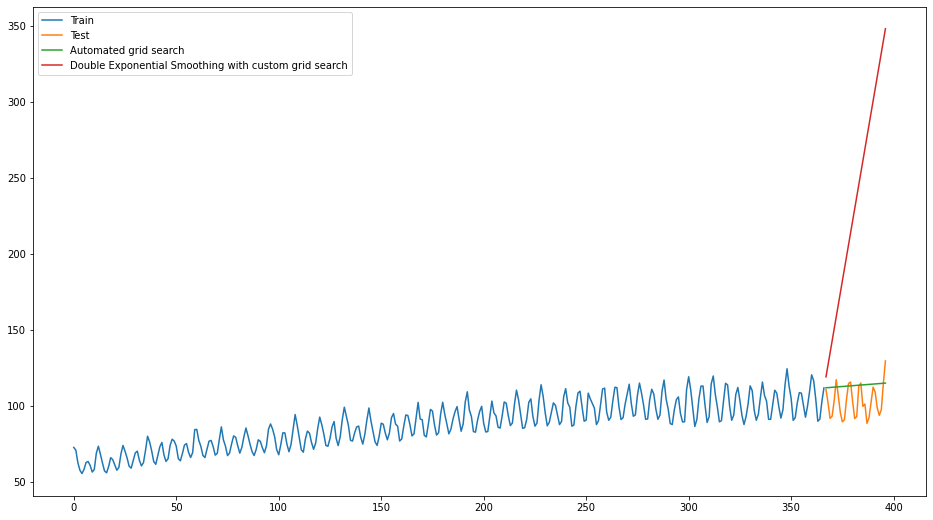

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Double Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()


From the result, we can see that Double Exponential Smoothing works far better on this data set than Simple Exponential Smoothing.

**Triple Exponential Smoothing**

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer

In [ ]:
df = pd.read_csv(r'/content/Electric_Production.csv')
df

DATE  IPG2211A2N
0     1/1/1985     72.5052
1     2/1/1985     70.6720
2     3/1/1985     62.4502
3     4/1/1985     57.4714
4     5/1/1985     55.3151
..         ...         ...
392   9/1/2017     98.6154
393  10/1/2017     93.6137
394  11/1/2017     97.3359
395  12/1/2017    114.7212
396   1/1/2018    129.4048

[397 rows x 2 columns]

In [ ]:
X = df['IPG2211A2N']
test = X.iloc[-30:]
train = X.iloc[:-30]

In [ ]:
'''
Holt Winter’s Exponential Smoothing
Parameters: 

    endog (array-like) – Time series
    trend ({"add", "mul", "additive", "multiplicative", None}, optional) – Type of trend component.
    damped (bool, optional) – Should the trend component be damped.
    seasonal ({"add", "mul", "additive", "multiplicative", None}, optional) – Type of seasonal component.
    seasonal_periods (int, optional) – The number of seasons to consider for the holt winters.
    '''


'\nHolt Winter’s Exponential Smoothing\nParameters: \n\n    endog (array-like) – Time series\n    trend ({"add", "mul", "additive", "multiplicative", None}, optional) – Type of trend component.\n    damped (bool, optional) – Should the trend component be damped.\n    seasonal ({"add", "mul", "additive", "multiplicative", None}, optional) – Type of seasonal component.\n    seasonal_periods (int, optional) – The number of seasons to consider for the holt winters.\n    '

In [ ]:
'''
fit Parameters: 

    smoothing_level (float, optional) – The alpha value of the simple exponential smoothing, if the value is set then this value will be used as the value.
    smoothing_slope (float, optional) – The beta value of the holts trend method, if the value is set then this value will be used as the value.
    smoothing_seasonal (float, optional) – The gamma value of the holt winters seasonal method, if the value is set then this value will be used as the value.
    damping_slope (float, optional) – The phi value of the damped method, if the value is set then this value will be used as the value.
    optimized (bool, optional) – Should the values that have not been set above be optimized automatically?
    use_boxcox ({True, False, 'log', float}, optional) – Should the boxcox tranform be applied to the data first? If ‘log’ then apply the log. If float then use lambda equal to float.
    remove_bias (bool, optional) – Should the bias be removed from the forecast values and fitted values before being returned? Does this by enforcing average residuals equal to zero.
    use_basinhopping (bool, optional) – Should the opptimser try harder using basinhopping to find optimal values?
'''


"\nfit Parameters: \n\n    smoothing_level (float, optional) – The alpha value of the simple exponential smoothing, if the value is set then this value will be used as the value.\n    smoothing_slope (float, optional) – The beta value of the holts trend method, if the value is set then this value will be used as the value.\n    smoothing_seasonal (float, optional) – The gamma value of the holt winters seasonal method, if the value is set then this value will be used as the value.\n    damping_slope (float, optional) – The phi value of the damped method, if the value is set then this value will be used as the value.\n    optimized (bool, optional) – Should the values that have not been set above be optimized automatically?\n    use_boxcox ({True, False, 'log', float}, optional) – Should the boxcox tranform be applied to the data first? If ‘log’ then apply the log. If float then use lambda equal to float.\n    remove_bias (bool, optional) – Should the bias be removed from the forecast va

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
from sklearn.model_selection import ParameterGrid
param_grid = {'trend': ['add', 'mul'],'seasonal' :['add', 'mul'],'seasonal_periods':[3,6,12], 'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False], 'use_boxcox':[True, False],
             'remove_bias':[True, False],'use_basinhopping':[True, False]}
pg = list(ParameterGrid(param_grid))

In [ ]:
df_results_moni = pd.DataFrame(columns=['trend','seasonal_periods','smoothing_level', 'smoothing_slope','damping_slope','damped','use_boxcox','remove_bias','use_basinhopping','RMSE','r2'])
start = timer()
print('Starting Grid Search..')
for a,b in enumerate(pg):
    trend = b.get('trend')
    smoothing_level = b.get('smoothing_level')
    seasonal_periods = b.get('seasonal_periods')
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    use_boxcox = b.get('use_boxcox')
    remove_bias = b.get('remove_bias')
    use_basinhopping = b.get('use_basinhopping')
    #print(trend,smoothing_level, smoothing_slope,damping_slope,damped,use_boxcox,remove_bias,use_basinhopping)
    fit1 = ExponentialSmoothing(train,trend=trend, damped=damped,seasonal_periods=seasonal_periods ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope,use_boxcox=use_boxcox,optimized=False)
    #fit1.summary
    z = fit1.forecast(30)
    #print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    #print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'trend':trend,'seasonal_periods':seasonal_periods,'smoothing_level':smoothing_level, 'smoothing_slope':smoothing_slope,'damping_slope':damping_slope,'damped':damped,'use_boxcox':use_boxcox,'use_basinhopping':use_basinhopping,'RMSE':RMSE,'r2':r2}, ignore_index=True)
print('End of Grid Search')
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')


Starting Grid Search..


Streaming output truncated to the last 5000 lines.
<ipython-input-38-50299d602a92>:16: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = ExponentialSmoothing(train,trend=trend, damped=damped,seasonal_periods=seasonal_periods ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope,use_boxcox=use_boxcox,optimized=False)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-38-50299d602a92>:16: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = ExponentialSmoothing(train,trend=trend, damped=damped,seasonal_periods=seasonal_periods ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope,use_boxcox=use_boxcox,optimized=False)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decora

KeyboardInterrupt: ignored

In [ ]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)


 Below mentioned parameter gives least RMSE and r2


trend seasonal_periods  smoothing_level  smoothing_slope  damping_slope  \
70224   add                3              0.4              0.4            0.1   

      damped use_boxcox  remove_bias use_basinhopping       RMSE        r2  
70224  False       True          NaN             True  10.145448  0.003923

In [ ]:
df_results_moni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4027 entries, 0 to 4026
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trend             4027 non-null   object 
 1   seasonal_periods  4027 non-null   object 
 2   smoothing_level   4027 non-null   float64
 3   smoothing_slope   4027 non-null   float64
 4   damping_slope     4027 non-null   float64
 5   damped            4027 non-null   object 
 6   use_boxcox        4027 non-null   object 
 7   remove_bias       0 non-null      float64
 8   use_basinhopping  4027 non-null   object 
 9   RMSE              4027 non-null   float64
 10  r2                4027 non-null   float64
dtypes: float64(6), object(5)
memory usage: 346.2+ KB


In [ ]:
fit1 = ExponentialSmoothing(train,trend='mul', damped=False,seasonal_periods=3 ).fit(smoothing_level=0.9, 
                                    smoothing_slope=0.6, damping_slope = 0.6,use_boxcox=False,use_basinhopping = True,optimized=False)
Forecast_custom_pred = fit1.forecast(30)
fit1.summary()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:1116: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmod

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:               IPG2211A2N   No. Observations:                  367
Model:             ExponentialSmoothing   SSE                          34463.243
Optimized:                        False   AIC                           1675.019
Trend:                   Multiplicative   BIC                           1690.641
Seasonal:                          None   AICC                          1675.253
Seasonal Periods:                  None   Date:                 Wed, 19 Oct 2022
Box-Cox:                          False   Time:                         15:47:15
Box-Cox Coeff.:                    None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9000000                alpha                False
smoothing_trend            0.6000000                 beta                False
initial_level              72.505200                  l.0                False
initial_trend              0.9747163                  b.0                False
------------------------------------------------------------------------------
"""

In [ ]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 223951.02097323517
MAE is : 364.5145029863719
RMSE is : 473.23463627806785
MAPE is : 352.58186406151964
R2 is : -2166.2233590586425



In [ ]:
# Fitting model with optimized =True
fitESAUTO = ExponentialSmoothing(train).fit(optimized= True, use_brute = True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [ ]:
fitESAUTO.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:               IPG2211A2N   No. Observations:                  367
Model:             ExponentialSmoothing   SSE                          20798.766
Optimized:                         True   AIC                           1485.684
Trend:                             None   BIC                           1493.495
Seasonal:                          None   AICC                          1485.795
Seasonal Periods:                  None   Date:                 Wed, 19 Oct 2022
Box-Cox:                          False   Time:                         15:47:40
Box-Cox Coeff.:                    None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
initial_level              72.505275                  l.0                 True
------------------------------------------------------------------------------
"""

In [ ]:
fitESAUTOpred = fitESAUTO.forecast(30)
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 180.04660392337368
MAE is : 11.288876604177263
RMSE is : 13.418144578270637
MAPE is : 11.625659787328726
R2 is : -0.7423506445570016



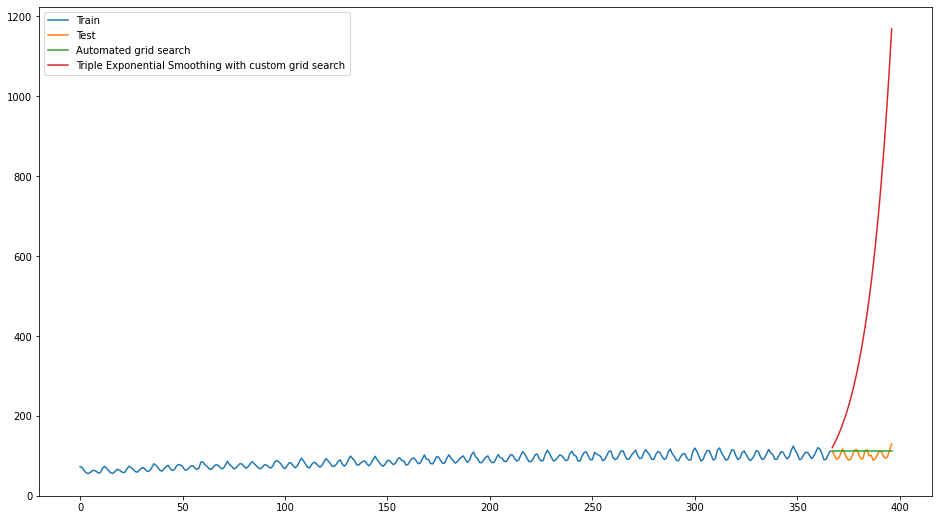

In [ ]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Triple Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()

This model also scores well. But overall, the Triple Exponential Smoothing model performs best.